In [1]:
import os
import shutil

# Function to extract .java files from a folder and its subfolders
def extract_java_files(folder_path):
    java_files = set()
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".java"):
                java_files.add(os.path.join(root, file))
    return java_files

# Function to copy a list of source files to a destination folder
def copy_files(source_files, destination_folder):
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)
    for file in source_files:
        shutil.copy(file, destination_folder)

# Function to extract class information from .java files
def extract_class_info(java_files):
    class_info = []
    for file in java_files:
        with open(file, 'r') as f:
            lines = f.readlines()
            package = ''
            class_name = ''
            for line in lines:
                if line.startswith('package'):
                    package = line.split(' ')[1].strip().replace(';', '')
                elif line.startswith('public class'):
                    class_name = line.split(' ')[2].strip().split(' ')[0]
                    break
            if package and class_name:
                class_info.append((class_name, package))
    return class_info

# Exemple d'utilisation
source_folder_path = "../cargotracker" # Replace with the source folder path containing .java files
destination_folder_path = "classes_cargo"  # Replace with the destination folder path
output_file_path = "class_cargo_info.txt"  # Output file path

java_files = extract_java_files(source_folder_path)
copy_files(java_files, destination_folder_path)

class_info = extract_class_info(java_files)

# Write class names and packages to the output file
nbClasses = 0
with open(output_file_path, 'w') as output_file:
    for class_name, package in class_info:
        output_file.write(f"Class: {class_name}\n")
        print(class_name)
        output_file.write(f"Package: {package}\n")
        output_file.write("----\n")
        nbClasses +=1
        
print ("NB Classes :",nbClasses )


CargoStatusDtoAssembler
SampleVoyages
CargoDetails
HandlingEventServiceTest
UnknownVoyageException
UploadDirectoryScanner
FileProcessorJobListener
HandlingEventFactory
RealtimeCargoTrackingViewAdapter
GraphDao
BookingServiceTest
JpaVoyageRepository
ItineraryTest
ItineraryCandidateDtoAssembler
CargoStatus
DateConverter
Location
TransitPath
TransitEdge
NotSpecification<T>
AndSpecification<T>
DeliveredCargoConsumer
HandlingReportService
CargoLifecycleScenarioTest
JpaHandlingEventRepository
JpaCargoRepository
EventFilesCheckpoint
CargoHandledConsumer
EventItemWriter
Location
ChangeArrivalDeadline
EventLogger
Itinerary
HandlingEventRegistrationAttempt
JpaLocationRepository
DomainObjectUtils
FacesConfiguration
CargoTest
TrackingId
ChangeDestination
ApplicationSettings
ChangeDestinationDialog
HandlingEventTest
TrackingEventsDtoAssembler
ListCargo
UnLocode
SampleDataGenerator
SampleLocations
CoordinatesFactory
RouteSpecificationTest
UnknownCargoException
JmsApplicationEvents
RealtimeCargoTrack

In [8]:
# Definition of the input file name
input_file = "class_cargo_info.txt"

# Definition of the output file name for entity classes
output_file_entity = "Typed_classes_cargo/cargo_entity.txt"

# Definition of the output file name for application classes
output_file_application = "Typed_classes_cargo/cargo_application.txt"

# Definition of the output file name for utility classes
output_file_utility = "Typed_classes_cargo/cargo_utility.txt"

# Packages to search for entity classes
package_entity_prefix1 = "org.eclipse.cargotracker.domain.model"
package_entity_prefix2 = "org.eclipse.cargotracker.infrastructure.persistence.jpa"


# Packages to search for application classes
package_application_prefix1 = "org.eclipse.cargotracker.application"
package_application_prefix2 = "org.eclipse.cargotracker.domain.service"
package_application_prefix3 = "org.eclipse.cargotracker.domain.shared"
package_application_prefix4 = "org.eclipse.cargotracker.infrastructure.messaging.jms"
package_application_prefix5 = "org.eclipse.cargotracker.infrastructure.routing"
package_application_prefix6 = "org.eclipse.cargotracker.infrastructure.events.cdi"
package_application_prefix7 = "org.eclipse.cargotracker.interfaces.booking.sse"
package_application_prefix8 = "org.eclipse.cargotracker.interfaces.booking.web"
package_application_prefix9 = "org.eclipse.cargotracker.interfaces.handling.mobile"
package_application_prefix10 = "org.eclipse.pathfinder.api"

# Packages to search for utility classes
package_utility_prefix1 = "org.eclipse.cargotracker.infrastructure.logging"
package_utility_prefix2 = "org.eclipse.cargotracker.interfaces.booking.facade.internal.assembler"
package_utility_prefix3 = "org.eclipse.cargotracker.interfaces.handling.file"
package_utility_prefix4 = "org.eclipse.cargotracker.interfaces.handling.rest"

# Lists to store file names
entity_file_names = []
application_file_names = []
utility_file_names = []

# Read the input file
with open(input_file, "r") as file:
    lines = file.readlines()

    # Traverse the lines in the file
    for i in range(len(lines)):
        if lines[i].startswith("Class:"):
            # Get the class name and package
            class_name = lines[i].split(":")[1].strip().split("<")[0]
            package = lines[i+1].split(":")[1].strip()

            # Check if the package matches the desired prefixes
            if (package.startswith(package_entity_prefix1) or
                package.startswith(package_entity_prefix2) or
                package.startswith(package_entity_prefix3)) :
                entity_file_names.append(class_name)
                
            elif (package.startswith(package_application_prefix1) 
                or package.startswith(package_application_prefix2) 
                or package.startswith(package_application_prefix3)
                or package.startswith(package_application_prefix4)
                or package.startswith(package_application_prefix5)
                or package.startswith(package_application_prefix6)
                or package.startswith(package_application_prefix7)
                or package.startswith(package_application_prefix8)
                or package.startswith(package_application_prefix9) 
                or package.startswith(package_application_prefix10)):
                application_file_names.append(class_name)
                
            elif (package.startswith(package_utility_prefix1) 
                or package.startswith(package_utility_prefix2) 
                or package.startswith(package_utility_prefix3) 
                or package.startswith(package_utility_prefix4)):
                utility_file_names.append(class_name)
                
# Write file names for entity classes
with open(output_file_entity, "w") as file:
    for file_name in entity_file_names:
        file.write(file_name + "\n")

# Write file names for application classes
with open(output_file_application, "w") as file:
    file.write("BookingServiceFacade" + "\n")
    file.write("DefaultBookingServiceFacade" + "\n")
    for file_name in application_file_names:
        file.write(file_name + "\n")
        
# Write file names for utility classes
with open(output_file_utility, "w") as file:
    file.write("HandlingEventRegistrationAttempt" + "\n")
    file.write("Coordinates" + "\n")
    file.write("CoordinatesFactory" + "\n")
    for file_name in utility_file_names:
        file.write(file_name + "\n")

print("File extraction completed.")
print("File names from the 'org.eclipse.cargotracker.domain.model' package are saved in", output_file_entity)
print("File names from the 'org.eclipse.cargotracker.application' package are saved in", output_file_application)


File extraction completed.
File names from the 'org.eclipse.cargotracker.domain.model' package are saved in Typed_classes_cargo/cargo_entity.txt
File names from the 'org.eclipse.cargotracker.application' package are saved in Typed_classes_cargo/cargo_application.txt


In [9]:
graphFile='classes_cargo/'

# Get embadding distance

In [10]:
import javalang
import re
import numpy as np

In [11]:
import javalang

# Function to parse a Java file and return its abstract syntax tree (AST)
def parse_java_file_ast(path):
    with open(path, encoding='utf-8') as javafile:
        lines = javafile.read()
        tree = javalang.parse.parse(lines)
    return tree

# Function to get the name of the package from the AST
def getPackage(tree):
    return tree.package.name

# Function to get a list of import statements from the AST
def getImports(tree):
    return [node.path for node in tree.imports]

# Function to get a list of method names from the main class in the AST
def getMethods(tree):
    return [method.name for method in tree.types[0].methods]

# Function to get a list of field (variable) names from the main class in the AST
def getFields(tree):
    return [node.declarators[0].name for node in tree.types[0].fields]

# Function to get the name of the main class from the AST
def getName(tree):
    return tree.types[0].name


In [12]:
# Initialize lists to store data, application, entity, and utility elements
data = []
app = []
entity = []
utility = []

# Read and process the "cargo_application.txt" file
with open("Typed_classes_cargo/cargo_application.txt", "r") as inp:
    applicationF = inp.read().splitlines()
    
    # Close the file
    inp.close()
    
    # Process each line in the file
    for c in applicationF:
        z = c.split(".")
        elem = z[-1].strip().lower()
        data.append(elem)
        app.append(elem)

# Read and process the "cargo_utility.txt" file
with open("Typed_classes_cargo/cargo_utility.txt", "r") as inp:
    utilityF = inp.read().splitlines()
    
    # Close the file
    inp.close()
    
    # Process each line in the file
    for c in utilityF:
        z = c.split(".")
        elem = z[-1].strip().lower()
        data.append(elem)
        utility.append(elem)

# Read and process the "cargo_entity.txt" file
with open("Typed_classes_cargo/cargo_entity.txt", "r") as inp:
    entityF = inp.read().splitlines()
    
    # Close the file
    inp.close()
    
    # Process each line in the file
    for c in entityF:
        z = c.split(".")
        elem = z[-1].strip().lower()
        data.append(elem)
        entity.append(elem)

# Print the length of the "entity" list
print(len(entity))


37


In [13]:
# entity:
    # handlinghistory, jpahandlingeventrepository, cargotest, unknownlocationexception, samplevoyages, routespecification, trackingevents, routecandidate, jpalocationrepository, location, handlingeventtest, routespecificationtest, unknowncargoexception, itinerarytest, schedule, delivery, handlingeventfactory, leg, voyage, handlingactivity, itinerary, cargo, handlingevent, trackingid, unknownvoyageexception, cannotcreatehandlingeventexception, unlocode, handlinghistorytest, cargoroute, voyagenumber, carriermovement, cargostatus, jpavoyagerepository, leg, samplelocations, location, jpacargorepository

# app:
    # bookingservicefacade, defaultbookingservicefacade, restconfiguration, changearrivaldeadline, misdirectedcargoconsumer, changearrivaldeadlinedialog, defaultbookingservice, bookingservicetest, transitedge, jmsapplicationevents, externalroutingservice, sampledatagenerator, handlingeventregistrationattemptconsumer, changedestinationdialog, deliveredcargoconsumer, andspecification, realtimecargotrackingservice, externalroutingservicetest, notspecification, rejectedregistrationattemptsconsumer, listcargo, eventlogger, itineraryselection, transitpath, booking, graphtraversalservice, track, changedestination, domainobjectutils, dateconverter, cargodetails, orspecification, handlingeventservicetest, locationviewadapter, defaultcargoinspectionservice, applicationsettings, realtimecargotrackingviewadapter, cargohandledconsumer, bookingservicetestdatagenerator, defaulthandlingeventservice

# utility:
    # coordinates, coordinatesfactory, lineparseexceptionlistener, handlingreport, itinerarycandidatedtoassembler, eventfilescheckpoint, eventitemwriter, eventlineparseexception, eventitemreader, cargostatusdtoassembler, loggerproducer, handlingreportservice, trackingeventsdtoassembler, fileprocessorjoblistener, uploaddirectoryscanner, cargoroutedtoassembler, locationdtoassembler


### Word2vec

In [14]:
# Import the necessary libraries
import nltk
from nltk.stem import WordNetLemmatizer

# Download the WordNet dataset if not already downloaded
nltk.download('wordnet')

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a given string
def getLemm(string):
    return lemmatizer.lemmatize(string)


[nltk_data] Downloading package wordnet to /Users/bramss/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
# Import the necessary libraries
from gensim.models import Word2Vec
import gensim.downloader as api

# Load the Google News Word2Vec model using Gensim's downloader
v2w_model = api.load('word2vec-google-news-300')


In [16]:
# Function to obtain Word2Vec embeddings for a given string
def embadW2V(string):
    # Use the loaded Word2Vec model to get embeddings for the input string
    return v2w_model[string]


In [17]:
# Import the required libraries from scipy.spatial
from scipy.spatial import distance
from scipy import spatial

# Function to calculate the cosine distance between two arrays
def distanceSementic(arr1, arr2):
    # Calculate the cosine distance between arr1 and arr2
    return spatial.distance.cosine(arr1, arr2)

    # You can also use the following line to calculate the Euclidean distance:
    # return distance.euclidean(arr1, arr2)


In [18]:
# Function to read a file and return its content as an array of lines
def readFile(fileName):
    # Open the file in read mode
    fileObj = open(fileName, "r")
    
    # Read the file content and split it into an array of lines
    lines = fileObj.read().splitlines()
    
    # Close the file
    fileObj.close()
    
    # Return the array of lines
    return lines


In [19]:
# List of stop words to filter out from text data
stopW = [
    'persistence', 'javax', 'util', 'springframework', 'beans', 'core', 'support', 'jdbc', 'override', 'extractor',
    '@link', 'row', 'mapper', 'id', 'name', 'link', 'handle', 'cancel', "title", 'parent', "cell", "bean", 'loader',
    'stage', 'pressed', 'dragged', 'view', 'jpa', 'test', 'repository', 'box', 'initialize', "total", "view", "image",
    "icon", "offset", "node", "scene", 'duration', 'drawer', 'nav', 'load', 'data', 'is', 'empty', 'all', "static",
    'cascade', 'transaction', 'override', 'join', 'one', 'description', 'strategy', 'generation', 'override',
    'persistence', 'generated', 'io', 'projection', 'property', 'commit', 'dao', 'this', 'style', 'menu', 'begin',
    'column', 'translate', 'on', 'selected', 'name', "png", "logo", 'string', 'name', "table", "exception",
    'contains', 'filter', 'controller', 'implement', 'button', 'session', 'hibernate', 'array', 'org', 'save',
    'clear', 'boolean', 'init', 'remove', 'entity', 'observable', 'double', 'length', 'alert', 'action', 'field',
    'bundle', 'show', 'root', 'list', 'index', 'text', 'return', 'wait', 'lower', 'true', 'false', 'java', 'util',
    'long', 'collection', 'interface', 'layout', 'value', 'valid', 'is', 'value', 'type', 'model', 'public',
    'private', 'id', 'error', 'void', 'not', 'int', 'float', 'for', 'set', 'catch', 'try', 'javafx', 'import',
    'class', 'com', 'package', 'if', 'else', 'null', 'no', 'delete', 'add', 'edit', 'get', 'new', 'open', 'close',
    'mouse', 'event', 'window', 'throw'
]

# If you want to clear the list and have no stop words, uncomment the following line:
# stopW = []


In [20]:
# Import the NLTK library
import nltk

# Download the Open Multilingual WordNet (OMW) dataset version 1.4 using NLTK
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to /Users/bramss/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [21]:
typedClasses=data

# Regular expression to split camel case words
rx = re.compile(r'(?<=[a-z])(?=[A-Z])')
# Create a dictionary to store all words
allWords=dict()

# Loop through typed classes
for elem in typedClasses:
    
    # Read the content of a Java file for the current typed class
    filelines=readFile(graphFile+elem.lower()+'.java')
    
    # Initialize a list to store words from the file
    strings=[]
    
    # Process each line in the file
    for s in filelines:
        # Extract only alphabetical characters from the line
        sentence = " ".join(re.findall("[a-zA-Z]+", s))
        
        # Split the sentence into words
        words = sentence.split()
        
        # Filter out stop words and add non-stop words to the strings list
        for w in words:
            if(w not in stopW):
                strings.append(w)
    # Split camel case words into separate words
    nstrings = [re.findall('.[^A-Z]*', string) for string in strings]
    
     # Initialize lists for lemmatized and valid word
    all=[]
    for ns in nstrings:
        all=all+ns
    #lemm + to lower cases
    treatedW=[]
    embads=[]
    w=[]
    
    # Lemmatize and convert words to lowercase
    for a in all:
        treatedW.append(getLemm(a.lower()))
    # Check if a word is in the Word2Vec model and not a stop word
    for t in treatedW:
        if(t in v2w_model and t not in stopW and len(t)>1):
            if t in allWords:
                allWords[t]=allWords[t]+1
            else:
                allWords[t]=1
print(len(allWords))
reccurency= 0
for a in allWords:
    reccurency+=allWords[a]
print(reccurency)
for a in allWords:
    allWords[a]=allWords[a]/reccurency


860
18951


In [22]:
# Create a regular expression to split camel case words
rx = re.compile(r'(?<=[a-z])(?=[A-Z])')

# Create a dictionary to store word embeddings
embadDict = {}

# Create a dictionary to store word lists for each class
wListClass = {}

# Set a value for aSIF (not defined in the code, assume it's a hyperparameter)
aSIF = 0.001

# Loop through typed classes
for elem in typedClasses:
    # Parse the Java file using the Abstract Syntax Tree (AST)
    tree=parse_java_file_ast(graphFile+elem.lower()+'.java')
    
    
    #methods=getMethods(tree)
    #fields=getFields(tree)
    #strings=methods+fields
    #strings.append(getName(tree))
    
    
    # Read the content of the Java file
    filelines=readFile(graphFile+elem.lower()+'.java')
    # Initialize a list to store words from the file
    strings = []
    
    # Process each line in the file
    for s in filelines:
        
        # Extract only alphabetical characters from the line
        sentence=" ".join(re.findall("[a-zA-Z]+", s))
        words=sentence.split()
        
        for w in words:
            # Filter out stop words and add non-stop words to the strings list
            if(w not in stopW):
                strings.append(w)
    # Split camel case words into separate words            
    nstrings = [re.findall('.[^A-Z]*', string) for string in strings]
    
    # Initialize a list to store all words
    all = []
    
    # Concatenate all the lists of words
    for ns in nstrings:
        all=all+ns
    #lemm + to lower cases
    # Lemmatize words and convert them to lowercase
    treatedW=[]
    embads=[]
    w=[]
    for a in all:
        treatedW.append(getLemm(a.lower()))
        
    # Check if a word is in the Word2Vec model and not a stop word    
    for t in treatedW:
        if(t in v2w_model and t not in stopW and len(t)>1):
            w.append(t)
            coefSIF=aSIF/(aSIF+allWords[t])
            emzz=embadW2V(t)
            #embads.append(coefSIF*emzz)
            embads.append(emzz)
            
    # Store the word list for the class        
    wListClass[elem]=w
    # Create a numpy matrix from the word embeddings
    npmatrix = np.matrix(embads)
    
    # Calculate the mean of the word embeddings
    if(len(npmatrix) > 1): 
        meanmatrix=npmatrix.mean(0)
        
        embadDict[elem]=meanmatrix
    else:
        embadDict[elem]=npmatrix


## Create dict with relation distance 

### Calculate static distance

In [23]:
import csv

# Create a list to store distances
distances = []

# Initialize variables for static distance calculation
staticDistanceMin = 99999
staticDistanceMax = 0

# Open a CSV file for reading
with open('cargo_final-Graph.csv', newline='') as posgraph:
    reader = csv.reader(posgraph, delimiter=';')
    
    # Iterate through each row in the CSV file
    for row in reader:
        rowClass=[]
        
        # Get class names from the CSV row and convert to lowercase
        class1=row[0].lower().split('.')[-1]
        class2= row[1].lower().split('.')[-1]

        # Check if the class names are in the embadDict (word embeddings)
        if(class1 in embadDict and class2 in embadDict ):
            rowClass.append(class1)
            rowClass.append(class2)
            rowClass.append(row[2])
            
            # Update staticDistanceMax and staticDistanceMin
            if(float(row[2])>staticDistanceMax):
                staticDistanceMax=float(row[2])
            if(float(row[2])<staticDistanceMin):
                staticDistanceMin=float(row[2])
            #data.append(1-distanceSementic(embadDict[class1],embadDict[class2]))
            distances.append(rowClass)

# Reset staticDistanceMin to 0
staticDistanceMin = 0

# Normalize the distance values (not currently active)
#for d in distances:
    #d[2]=(float(d[2])-staticDistanceMin)/(staticDistanceMax-staticDistanceMin)


In [24]:
print(distances)

[['defaultbookingservicefacade', 'locationdtoassembler', '15.0'], ['voyagenumber', 'voyagenumber', '5.0'], ['bookingservicetest', 'delivery', '170.0'], ['itinerary', 'itinerary', '20.0'], ['location', 'unlocode', '20.0'], ['eventitemreader', 'handlingeventregistrationattempt', '5.0'], ['itinerarytest', 'leg', '10.0'], ['itinerarycandidatedtoassembler', 'itinerary', '5.0'], ['cargo', 'location', '10.0'], ['jmsapplicationevents', 'cargo', '15.0'], ['handlinghistorytest', 'cargo', '10.0'], ['bookingservicetest', 'trackingid', '10.0'], ['cargotest', 'trackingid', '45.0'], ['jpahandlingeventrepository', 'handlinghistory', '5.0'], ['bookingservicetest', 'handlingactivity', '15.0'], ['defaultbookingservicefacade', 'unlocode', '5.0'], ['jpacargorepository', 'itinerary', '5.0'], ['delivery', 'location', '25.0'], ['routespecification', 'routespecification', '20.0'], ['delivery', 'itinerary', '15.0'], ['lineparseexceptionlistener', 'eventlineparseexception', '5.0'], ['bookingservicetest', 'routes

### Calculate semantic distance

In [25]:
# Import the cosine distance function from scipy's spatial module
from scipy import spatial

# Define two data sets as lists
dataSetI = [3, 45, 7, 2]
dataSetII = [2, 54, 13, 15]

# Calculate the cosine similarity between the two data sets
# Cosine similarity ranges from -1 (completely dissimilar) to 1 (completely similar)
# Convert it to a similarity score by subtracting it from 1
result = 1 - spatial.distance.cosine(dataSetI, dataSetII)

# Print the similarity score
print(result)


0.97228425171235


In [26]:
# Initialize variables for semantic distance calculation
semanticDistanceMin = 99999
semanticDistanceMax = 0

# Create a list to store the fully connected graph
fullConnectG = []

# Iterate through each class in the typedClasses
for c in typedClasses:
    for tc in typedClasses:
        
        # Create a list to store class pairs and their distances
        d=[]
        d.append(c)
        d.append(tc)
        d.append(0)
        
        # Flatten the embeddings for the current classes
        embadDict[c] = np.ravel(embadDict[c])
        embadDict[tc] = np.ravel(embadDict[tc])
        
        # Calculate the semantic distance between the class embeddings
        dsemandic=1-distanceSementic(embadDict[c],embadDict[tc])    
        
        # Update semanticDistanceMax and semanticDistanceMin
        if(dsemandic>semanticDistanceMax):
            semanticDistanceMax=dsemandic
        if(dsemandic<semanticDistanceMin):
            semanticDistanceMin=dsemandic   
            
        # Add the semantic distance to the list
        d.append(dsemandic)
        
        # Append the class pair and their distances to the fully connected graph
        fullConnectG.append(d)
        
# Iterate through each entry in the fully connected graph       
for fcg in fullConnectG:
    for d in distances:
         # Update the semantic distance if a matching class pair is found in the distances list
        if(d[0]==fcg[0] and d[1]==fcg[1]):
            fcg[2]=d[2]
            break
    # Normalize the semantic distance
    fcg[3]=(fcg[3]-semanticDistanceMin)/(semanticDistanceMax-semanticDistanceMin)


## Create typed services

In [27]:
# Import necessary modules and libraries
from operator import itemgetter
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import kernighan_lin_bisection
import itertools
import matplotlib.pyplot as plt
import networkx as nx

# Define a function to find the heaviest edge in a graph
def heaviest(G):
    u, v, w = max(G.edges(data="weight"), key=itemgetter(2))
    return (u, v)

# Define a function to calculate the weighted score for a relationship between s and r
def weightSR(s, r):
    weightRelation = 100
    weightSementic = 100
    return (weightRelation * (float(r))) + (weightSementic * s)


In [28]:
# Create a new undirected graph using NetworkX
GApp = nx.Graph()

# Add nodes to the graph for each element in the 'app' list
for a in app:
    GApp.add_node(a)

# Iterate through the distances list
for d in distances:
    # Check if both elements of the distance are in the 'app' list
    if d[0] in app and d[1] in app:
        # Add an edge between the elements with a weight equal to the value in the third column (d[2])
        GApp.add_edge(d[0], d[1], weight=float(d[2]))


In [29]:
# Import the required modules
from cdlib import algorithms, viz

# Apply the Louvain community detection algorithm to the graph GApp
coms = algorithms.louvain(GApp, weight='weight', resolution=0.5)

# Print the detected communities
print(coms.communities)

# Store the detected communities in the 'applicationServices' variable
applicationServices = coms.communities

# Print the number of detected communities
print(len(applicationServices))


Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'graph_tool', 'karateclub', 'infomap'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'leidenalg', 'infomap'}
[['bookingservicefacade', 'defaultbookingservicefacade', 'cargodetails', 'changedestination', 'listcargo', 'itineraryselection', 'track', 'changearrivaldeadline', 'booking'], ['externalroutingservicetest', 'externalroutingservice', 'graphtraversalservice', 'transitedge', 'transitpath'], ['realtimecargotrackingviewadapter', 'locationviewadapter', 'realtimecargotrackingservice'], ['applicationsettings', 'sampledatagenerator'], ['defaulthandlingeventservice', 'handlingeventservicetest'], ['dateconverter', 'eventlogger'], ['restconfiguration'], ['deliveredcargoconsumer'], ['rejectedregistrationattemptsconsumer'], 

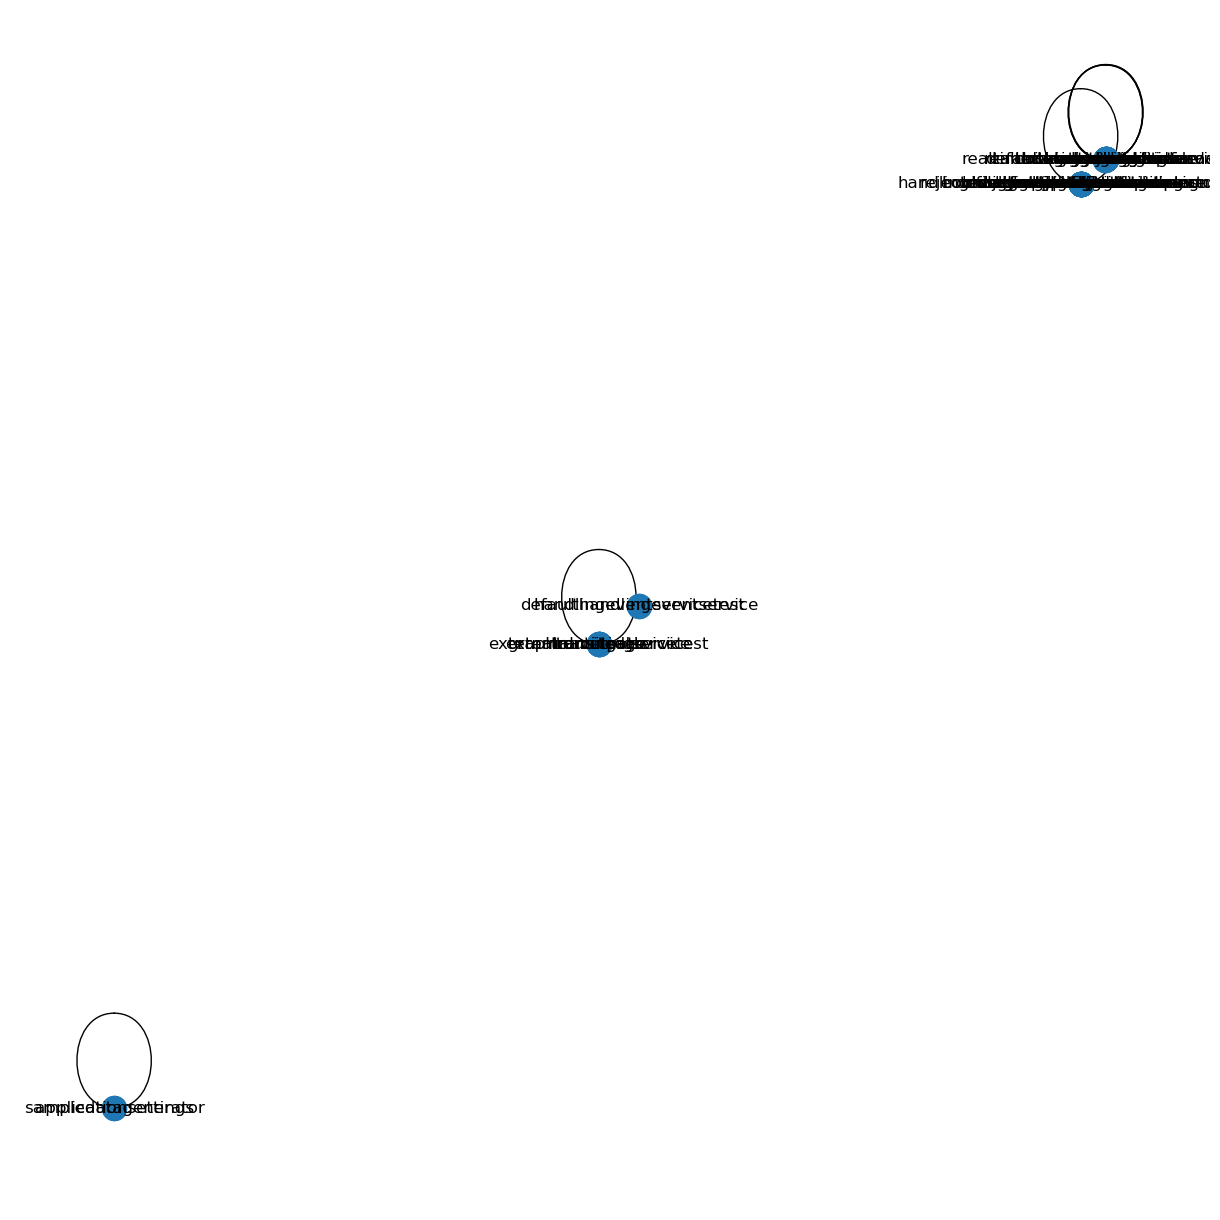

In [30]:
# Import the necessary libraries
import networkx as nx
import matplotlib.pyplot as plt

# Create a new undirected graph for visualization
GAppStatic = nx.Graph()

# Add nodes to the graph for each element in the 'app' list
for a in app:
    GAppStatic.add_node(a)

# Iterate through the distances list
for d in distances:
    # Check if both elements of the distance are in the 'app' list
    if d[0] in app and d[1] in app:
        # Add an edge between the elements
        GAppStatic.add_edge(d[0], d[1])

# Create a larger figure for the plot
plt.figure(3, figsize=(12, 12))

# Save the figure as 'circlar.png' (the line seems to be a placeholder)
plt.savefig("circlar.png")

# Specify the layout using spectral_layout
pos = nx.spectral_layout(GAppStatic)

# Draw the graph with node labels
nx.draw(GAppStatic, pos=pos, with_labels=True)

# Show the plot
plt.show()


In [31]:
# Create a new undirected graph for entity services using NetworkX
GEntity = nx.Graph()

# Add nodes to the graph for each element in the 'entity' list
for e in entity:
    GEntity.add_node(e)

# Iterate through the distances list
for d in distances:
    # Check if both elements of the distance are in the 'entity' list
    if d[0] in entity and d[1] in entity:
        # Add an edge between the elements with a weight equal to the value in the third column (d[2])
        GEntity.add_edge(d[0], d[1], weight=float(d[2]))

# Apply the Louvain community detection algorithm to the graph GEntity
coms = algorithms.louvain(GEntity, weight='weight', resolution=1)

# Print the detected communities for entity services
print(coms.communities)

# Store the detected communities in the 'entityServices' variable
entityServices = coms.communities

# Print the number of detected communities
print(len(entityServices))


[['cargo', 'cargotest', 'jpahandlingeventrepository', 'trackingid', 'handlingeventtest', 'handlinghistorytest', 'handlinghistory', 'jpacargorepository', 'handlingevent'], ['routecandidate', 'samplelocations', 'leg', 'location', 'carriermovement', 'cargoroute', 'unlocode'], ['unknowncargoexception', 'unknownlocationexception', 'cannotcreatehandlingeventexception', 'unknownvoyageexception', 'handlingeventfactory'], ['routespecification', 'routespecificationtest', 'itinerarytest', 'itinerary'], ['voyage', 'schedule', 'voyagenumber', 'samplevoyages'], ['cargostatus', 'trackingevents'], ['handlingactivity', 'delivery'], ['jpalocationrepository'], ['jpavoyagerepository']]
9


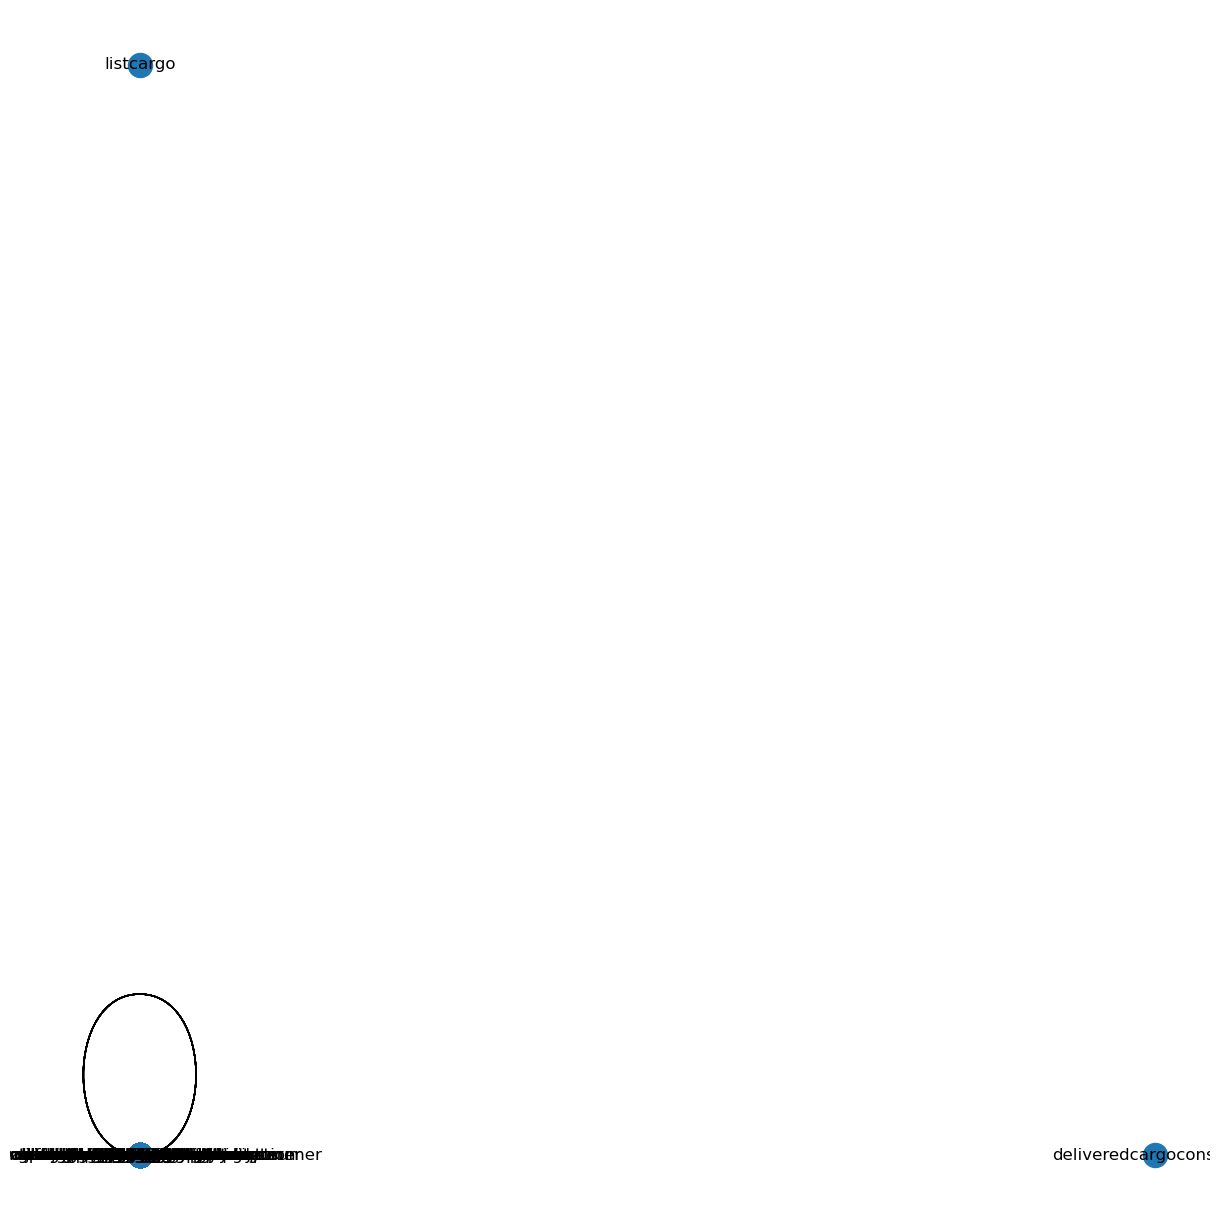

In [32]:
# Create a new undirected graph for entity services visualization using NetworkX
GEntityStatic = nx.Graph()

# Add nodes to the graph for each element in the 'app' list
for a in app:
    GEntityStatic.add_node(a)

# Iterate through the distances list
for d in distances:
    # Check if both elements of the distance are in the 'entity' list
    if d[0] in entity and d[1] in entity:
        # Add an edge between the elements
        GEntityStatic.add_edge(d[0], d[1])

# Create a larger figure for the plot
plt.figure(3, figsize=(12, 12))

# Save the figure as 'circlar.png' (the line seems to be a placeholder)
plt.savefig("circlar.png")

# Specify the layout using spectral_layout
pos = nx.spectral_layout(GEntityStatic)

# Draw the graph with node labels
nx.draw(GEntityStatic, pos=pos, with_labels=True)

# Show the plot
plt.show()


In [33]:
# Create a new undirected graph for utility services using NetworkX
GUtility = nx.Graph()

# Add nodes to the graph for each element in the 'utility' list
for u in utility:
    GUtility.add_node(u)

# Iterate through the distances list
for d in distances:
    # Check if both elements of the distance are in the 'utility' list
    if d[0] in utility and d[1] in utility:
        # Add an edge between the elements with a weight equal to the value in the third column (d[2])
        GUtility.add_edge(d[0], d[1], weight=float(d[2]))

# Apply the Louvain community detection algorithm to the graph GUtility
coms = algorithms.louvain(GUtility, weight='weight', resolution=0.5)

# Print the detected communities for utility services
print(coms.communities)

# Store the detected communities in the 'utilityServices' variable
utilityServices = coms.communities

# Print the number of detected communities
print(len(utilityServices))


[['eventitemreader', 'eventlineparseexception', 'lineparseexceptionlistener', 'eventfilescheckpoint'], ['handlingeventregistrationattempt', 'handlingreport', 'handlingreportservice'], ['locationdtoassembler', 'itinerarycandidatedtoassembler', 'cargoroutedtoassembler'], ['coordinates', 'coordinatesfactory'], ['cargostatusdtoassembler', 'trackingeventsdtoassembler'], ['uploaddirectoryscanner'], ['fileprocessorjoblistener'], ['loggerproducer'], ['eventitemwriter']]
9


### fine tune clusters

In [34]:
# Get the vocabulary and word indices from the Word2Vec model (v2w_model)
vocab = v2w_model.key_to_index

# The 'vocab' variable now contains a dictionary where words are keys and their corresponding indices are values


In [35]:
# Define the word to be checked
word = 'service1'

# Check if the word is present in the Word2Vec model's vocabulary
if word in v2w_model.key_to_index:
    # Print a message indicating that the word is present
    print(f"The word '{word}' is present in the vocabulary.")
else:
    # Print a message indicating that the word is not present
    print(f"The word '{word}' is not present in the vocabulary.")


The word 'service1' is not present in the vocabulary.


In [36]:
# Define a function for calculating the semantic similarity between two services
def service_semantic_similarity(service1, service2):
    # Get word vectors for the words in service1 and service2 after lemmatization
    vec1 = [getLemm(word) for word in service1]
    vec2 = [getLemm(word) for word in service2]

    # Calculate the cosine similarity between the word vectors
    similarity_score = v2w_model.n_similarity(vec1, vec2)

    return similarity_score

# Example of use
service1 = ['Jpa', 'Location', 'Repository']
service2 = ['Jpa', 'Handling', 'Repository']

# Remove stop words from the service1 and service2 arrays
service1_filtered = [word for word in service1 if word.lower() not in stopW]
service2_filtered = [word for word in service2 if word.lower() not in stopW]

# Print the filtered service arrays
print("Filtered service1:", service1_filtered)
print("Filtered service2:", service2_filtered)

# Calculate the semantic similarity between the filtered service arrays
similarity = service_semantic_similarity(service1_filtered, service2_filtered)

# Print the similarity score
print("Similarity score:", similarity)


Filtered service1: ['Location']
Filtered service2: ['Handling']
Similarity score: 0.16973138


In [37]:
import re

# Define a function to convert CamelCase to words
def camel_case_to_words(word):
    # Use regular expression to split the CamelCase word into words
    words = re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', word)
    # Join the words and convert to lowercase
    return ''.join(words).lower()

# Input CamelCase word
camel_case_word = "JpaLocationRepository"

# Call the function to convert it to words
result = camel_case_to_words(camel_case_word)

# Print the result
print(result)


jpalocationrepository


In [38]:
import re

# Function to split a CamelCase word into separate words
def split_camel_case(word):
    return re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', word)

# Function to find a CamelCase word in a text file
def find_camel_case_word(search_word, file_path):
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            # Split the line into separate words
            subwords = split_camel_case(line)
            # Join the subwords and convert to lowercase for comparison
            subword_str = ''.join(subwords).lower()
            if subword_str == search_word:
                return line
    return None

# Define the search word and file path
search_word = "jpalocationrepository"
file_path = "Typed_classes_cargo/cargo_entity.txt"

# Find the matching CamelCase word in the file
matching_word = find_camel_case_word(search_word, file_path)

# Print the CamelCase word as separate words
if matching_word:
    print("Matching word found:", matching_word)
    split_words = split_camel_case(matching_word)
    print("Split words:", split_words)
else:
    print("No matching word found.")


Matching word found: JpaLocationRepository
Split words: ['Jpa', 'Location', 'Repository']


In [41]:
# Define file paths for different types of services
file_path_entity = "Typed_classes_cargo/cargo_entity.txt"
file_path_utility = "Typed_classes_cargo/cargo_utility.txt"
file_path_application = "Typed_classes_cargo/cargo_application.txt"

# Define a function to fine-tune clusters of services
def fineTuneCluster(service, indexS, services, file_path):
    scoreService = [0] * len(services)
    insideDistance = 0
    
    # Loop through the distances between services
    for d in distances:
        if d[0] == service and d[1] != service:
            for i, s in enumerate(services):
                for ones in s:
                    if d[1] == ones:
                        insideDistance = 1
                        scoreService[i] += d[2]
                        break
        elif d[1] == service and d[0] != service:
            for i, s in enumerate(services):
                for ones in s:
                    if d[0] == ones:
                        insideDistance = 1
                        scoreService[i] += d[2]
                        break
                       
    if insideDistance == 0:  # Service doesn't belong to the distance table
        camelCaseService1 = find_camel_case_word(service, file_path)
        s1 = split_camel_case(camelCaseService1)
        service1_filtered = [word for word in s1 if word.lower() not in stopW]
        for i, s in enumerate(services):
            if i != indexS:
                for ones in s:

                    # Semantic comparison of the service name with other services
                    camelCaseService2 = find_camel_case_word(ones, file_path)
                    s2 = split_camel_case(camelCaseService2)
                    service2_filtered = [word for word in s2 if word.lower() not in stopW]

                    similarity_score = service_semantic_similarity(service1_filtered, service2_filtered)

                    if similarity_score > scoreService[i]:
                        scoreService[i] = similarity_score
                    break

    maxscore = max(scoreService)
    if maxscore > 0:
        maxIndex = scoreService.index(max(scoreService))
        indices = []
        for i, x in enumerate(scoreService):
            if x == maxscore:
                indices.append(i)
        if len(indices) == 1:
            services[maxIndex].append(service)
            services.remove([service])
    return services

# Fine-tune clusters for entity services
arrayEntityServices = []
for es in entityServices:
    arrayEntityServices.append(es)
entityServices = arrayEntityServices
print(len(entityServices))
for i, es in enumerate(entityServices):
    if len(es) < 2:
        entityServices = fineTuneCluster(es[0], i, entityServices, file_path_entity)
print("***", entityServices)
print(len(entityServices))

# Fine-tune clusters for application services
arrayApplicationServices = []
for es in applicationServices:
    arrayApplicationServices.append(es)
applicationServices = arrayApplicationServices
print(len(applicationServices))
for i, es in enumerate(applicationServices):
    if len(es) < 2:
        applicationServices = fineTuneCluster(es[0], i, applicationServices, file_path_application)
print("***", applicationServices)
print(len(applicationServices))

# Fine-tune clusters for utility services
arrayUtilityServices = []
for es in utilityServices:
    arrayUtilityServices.append(es)
utilityServices = arrayUtilityServices
print(len(utilityServices))
# for i,es in enumerate(utilityServices):
#     if(len(es)<2): 
#         utilityServices=fineTuneCluster(es[0],i,utilityServices,file_path_utility)
print("***", utilityServices)
print(len(utilityServices))


7
*** [['cargo', 'cargotest', 'jpahandlingeventrepository', 'trackingid', 'handlingeventtest', 'handlinghistorytest', 'handlinghistory', 'jpacargorepository', 'handlingevent'], ['routecandidate', 'samplelocations', 'leg', 'location', 'carriermovement', 'cargoroute', 'unlocode'], ['unknowncargoexception', 'unknownlocationexception', 'cannotcreatehandlingeventexception', 'unknownvoyageexception', 'handlingeventfactory'], ['routespecification', 'routespecificationtest', 'itinerarytest', 'itinerary'], ['voyage', 'schedule', 'voyagenumber', 'samplevoyages', 'jpavoyagerepository'], ['cargostatus', 'trackingevents'], ['handlingactivity', 'delivery', 'jpalocationrepository']]
7
13
*** [['bookingservicefacade', 'defaultbookingservicefacade', 'cargodetails', 'changedestination', 'listcargo', 'itineraryselection', 'track', 'changearrivaldeadline', 'booking'], ['externalroutingservicetest', 'externalroutingservice', 'graphtraversalservice', 'transitedge', 'transitpath', 'restconfiguration'], ['rea

### Get performance metrics

In [36]:
# Ground truth (gt) clusters for utility services
gtUtilityA = [["LineParseExceptionListener", "EventItemReader", "EventFilesCheckpoint", "EventLineParseException", "EventItemWriter"],
              ["ItineraryCandidateDtoAssembler", "LocationDtoAssembler", "CargoRouteDtoAssembler"],
              ["TrackingEventsDtoAssembler", "CargoStatusDtoAssembler"],
              ["UploadDirectoryScanner"],
              ["LoggerProducer"],
              ["FileProcessorJobListener"],
              ["HandlingEventRegistrationAttempt", "HandlingReportService", "HandlingReport"],
              ["Coordinates", "CoordinatesFactory"]]

# Ground truth (gt) clusters for entity services
gtEntityA = [["Cargo", "Delivery", "HandlingActivity", "TrackingId", "HandlingEvent", "HandlingEventTest", "HandlingHistoryTest", "JpaCargoRepository", "HandlingHistory", "JpaHandlingEventRepository", "HandlingEventFactory", "CargoTest"],
              ["UnknownVoyageException", "UnknownVoyageException", "UnknownLocationException", "CannotCreateHandlingEventException"],
              ["RouteCandidate", "CargoRoute", "SampleLocations", "UnLocode", "Location", "JpaLocationRepository", "Leg", "CarrierMovement"],
              ["RouteSpecification", "RouteSpecificationTest", "Itinerary", "ItineraryTest"],
              ["CargoStatus", "TrackingEvents"],
              ["VoyageNumber", "Voyage", "Schedule", "SampleVoyages", "JpaVoyageRepository"]]

# Ground truth (gt) clusters for application services
gtApplicationA = [["CargoHandledConsumer", "DeliveredCargoConsumer", "MisdirectedCargoConsumer"],
                   ["HandlingEventRegistrationAttemptConsumer", "RejectedRegistrationAttemptsConsumer"],
                   ["BookingServiceTest", "BookingServiceTestDataGenerator", "DefaultBookingService"],
                   ["HandlingEventServiceTest", "DefaultHandlingEventService", "DefaultCargoInspectionService"],
                   ["AndSpecification", "NotSpecification", "OrSpecification"],
                   ["DomainObjectUtils"],
                   ["RealtimeCargoTrackingViewAdapter", "RealtimeCargoTrackingService", "LocationViewAdapter"],
                   ["ChangeDestinationDialog", "ChangeArrivalDeadlineDialog"],
                   ["BookingServiceFacade", "DefaultBookingServiceFacade", "ListCargo", "ChangeDestination", "ChangeArrivalDeadline", "ItinerarySelection", "Booking", "CargoDetails", "Track"],
                   ["ExternalRoutingService", "ExternalRoutingServiceTest", "TransitPath", "TransitEdge", "GraphTraversalService"],
                   ["DateConverter", "EventLogger"],
                   ["RestConfiguration"],
                   ["ApplicationSettings", "SampleDataGenerator", "JmsApplicationEvents"]]

# Create lowercase ground truth clusters
total_gt = len(gtUtilityA) + len(gtEntityA) + len(gtApplicationA)
gtUtility = []
gtEntity = []
gtApplication = []

for i in gtUtilityA:
    arr = [a.lower() for a in i]
    gtUtility.append(arr)

for i in gtEntityA:
    arr = [a.lower() for a in i]
    gtEntity.append(arr)

for i in gtApplicationA:
    arr = [a.lower() for a in i]
    gtApplication.append(arr)


In [37]:
exactEntityServices=[]
lenGT=len(gtEntity)
total_gt+=lenGT
for index,r in enumerate(entityServices):
    minDiff=99999
    minDiffIdenx=-1
    for i,g in enumerate(gtEntity):
            diff1=len(set(r)-set(g))
            diff2=len(set(g)-set(r))
            acc=(diff1+diff2)/len(g)
            if(acc<minDiff):
                minDiff=acc
                minDiffIdenx=i
    if(minDiff<=0.2):
        exactEntityServices.append(r)
        gtEntity.pop(minDiffIdenx)
lenexactEntityServices= 5
print("Predicted POS Entity: "+str(len(entityServices )))
print("GT: "+str(lenGT) )
print("True Predicted POS Entity:"+ str(len(exactEntityServices)) )
precision=lenexactEntityServices/len(entityServices)*100
recall=lenexactEntityServices/lenGT*100
fscore=2*recall*precision/(recall+precision)
print("precision: "+str(precision))
print("Recall: "+str(recall))
print("f-score: "+str(fscore))

Predicted POS Entity: 6
GT: 6
True Predicted POS Entity:5
precision: 83.33333333333334
Recall: 83.33333333333334
f-score: 83.33333333333334


In [38]:
exactApplicationServices=[]
lenGT=len(gtApplication)
total_gt+=lenGT

for index,r in enumerate(applicationServices):
    minDiff=99999
    minDiffIdenx=-1
    for i,g in enumerate(gtApplication):
            diff1=len(set(r)-set(g))
            diff2=len(set(g)-set(r))
            acc=(diff1+diff2)/len(g)
            if(acc<minDiff):
                minDiff=acc
                minDiffIdenx=i
    if(minDiff<=0.25):
        exactApplicationServices.append(r)
        gtApplication.pop(minDiffIdenx)
lenexactApplicationServices= 9
print("Predicted POS Application: "+str(len(applicationServices)))
print("GT: "+str(lenGT) )
print("True Predicted POS Application:"+ str(len(exactApplicationServices) ))
precision=lenexactApplicationServices/len(applicationServices )*100
recall=lenexactApplicationServices/lenGT*100
fscore=2*recall*precision/(recall+precision)
print("precision: "+str(precision))
print("Recall: "+str(recall))
print("f-score: "+str(fscore))

Predicted POS Application: 12
GT: 13
True Predicted POS Application:7
precision: 75.0
Recall: 69.23076923076923
f-score: 72.0


In [39]:
exactUtilityServices=[]
lenGT=len(gtUtility)
total_gt+=lenGT

for index,r in enumerate(utilityServices):
    minDiff=99999
    minDiffIdenx=-1
    for i,g in enumerate(gtUtility):
            diff1=len(set(r)-set(g))
            diff2=len(set(g)-set(r))
            acc=(diff1+diff2)/len(g)
            if(acc<minDiff):
                minDiff=acc
                minDiffIdenx=i
    if(minDiff<=0.35):
        exactUtilityServices.append(r)
        gtUtility.pop(minDiffIdenx)
lenexactexactUtilityServices= 7
print(len(utilityServices))        
print(lenexactexactUtilityServices) 

print("Predicted POS Utility: "+str(len(utilityServices )))
print("GT: "+str(lenGT) )
print("True Predicted POS Utility:"+ str(lenexactexactUtilityServices) )
precision=lenexactexactUtilityServices/len(utilityServices )*100
recall=lenexactexactUtilityServices/lenGT*100
fscore=2*recall*precision/(recall+precision)
print("precision: "+str(precision))
print("Recall: "+str(recall))
print("f-score: "+str(fscore))

9
7
Predicted POS Utility: 9
GT: 8
True Predicted POS Utility:7
precision: 77.77777777777779
Recall: 87.5
f-score: 82.35294117647061


## Creating graph from services

In [40]:
def embadServices(arrC):
    total = 0  # Total count of words in the services
    embadS = 0  # Total embedding value for the services

    for c in arrC:
        # Calculate the embedding for the service (embadC)
        embadC = embadDict[c] * len(wListClass[c])

        total += len(wListClass[c])  # Add the word count of the service to the total
        embadS = embadS + embadC  # Add the embedding value of the service to the total

    # Calculate the average embedding by dividing the total embedding by the total word count
    return embadS / total


In [41]:
services = {}  # Dictionary to store services by their names
servicesEmbad = {}  # Dictionary to store the embeddings for each service
classService = {}  # Dictionary to map each class to its corresponding service

# Process application services
for appS in applicationServices:
    name = "Application" + appS[0]  # Create a service name

    services[name] = appS  # Store the service in the services dictionary
    servicesEmbad[name] = embadServices(appS)  # Calculate and store the service's embedding
    for a in appS:
        classService[a] = name  # Map each class to its corresponding service

# Process entity services
for entityS in entityServices:
    name = "Entity" + entityS[0]

    services[name] = entityS
    servicesEmbad[name] = embadServices(entityS)
    for a in entityS:
        classService[a] = name

# Process utility services
for utilityS in utilityServices:
    name = "Utility" + utilityS[0]

    services[name] = utilityS
    servicesEmbad[name] = embadServices(utilityS)
    for a in utilityS:
        classService[a] = name


In [42]:
print(len(applicationServices))
print(len(entityServices))
print(len(utilityServices))
print(len(entity))

12
6
9
37


In [43]:
distanceServices = []  # List to store service distances and semantic similarities

# Iterate through the distances between classes
for d in distances:
    class1 = d[0]
    class2 = d[1]
    dis = float(d[2])

    # Check if both classes belong to services
    if class1 in classService and class2 in classService:
        S1 = classService[class1]  # Get the service of class1
        S2 = classService[class2]  # Get the service of class2
        found = False

        # Check if the pair (S1, S2) or (S2, S1) already exists in distanceServices
        for ds in distanceServices:
            if (ds[0] == S1 and ds[1] == S2) or (ds[1] == S1 and ds[0] == S2):
                ds[2] = ds[2] + dis  # Accumulate the distance
                ds[3] = ds[3] + distanceSementic(servicesEmbad[S1], servicesEmbad[S2])  # Accumulate the semantic similarity
                found = True

        if not found:
            # Calculate the semantic similarity between the services
            sementic = distanceSementic(servicesEmbad[S1], servicesEmbad[S2])

            # Add a new entry in distanceServices
            distanceServices.append([S1, S2, dis, sementic])


In [44]:
print(len(distanceServices))

79


## Microservice clustering

In [45]:
from networkx.algorithms.community import k_clique_communities


In [46]:
GServices = nx.Graph()  # Create a weighted graph for services

# Function to calculate the weighted score
def poidsSR(s, r):
    weightRelation = 0.1  # Weight for the relation distance
    weightSementic = 100  # Weight for the semantic similarity

    # Inverse the semantic similarity if it's not zero
    if not (s == 0):
        s = 1 / s

    # Calculate the weighted score using both relation distance and semantic similarity
    return (weightRelation * float(r)) + (weightSementic * s)

# Open a file to write weight information
f = open("weight.txt", "a")

# Iterate through the calculated distanceServices
for d in distanceServices:
    allWeight = poidsSR(d[3], d[2])  # Calculate the weighted score

    # Add an edge with weight to the graph
    GServices.add_edge(d[0], d[1], weight=allWeight)

    # Append the weight to the distanceServices entry
    d.append(allWeight)

    # Write the weight information to a file
    f.write(str(d[0]) + " " + str(d[1]) + " " + str(allWeight) + "\n")

# Close the file
f.close()


In [47]:
print(GServices.nodes)

['Applicationbookingservicefacade', 'Utilitylocationdtoassembler', 'Entitysamplevoyages', 'Applicationbookingservicetestdatagenerator', 'Entitycargo', 'Entityitinerarytest', 'Entitylocation', 'Utilitylineparseexceptionlistener', 'Utilityhandlingeventregistrationattempt', 'Applicationdefaultbookingservice', 'Applicationexternalroutingservicetest', 'Utilitytrackingeventsdtoassembler', 'Applicationhandlingeventservicetest', 'Entitycargostatus', 'Applicationsampledatagenerator', 'Applicationdateconverter', 'Applicationrealtimecargotrackingservice', 'Entitycannotcreatehandlingeventexception', 'Utilitycoordinates', 'Applicationmisdirectedcargoconsumer', 'Applicationrejectedregistrationattemptsconsumer']


In [48]:
nodeList = list(GServices.nodes)  # Get the list of nodes in GServices
print(nodeList)
print(len(nodeList))  # Print the number of nodes

adjMatrix = []  # Initialize an empty adjacency matrix
INF = 999  # A large value representing infinity (used for unconnected nodes)

# Initialize the adjacency matrix with INF values
for node1 in nodeList:
    array = []
    for node2 in nodeList:
        array.append(INF)
    adjMatrix.append(array)

# Iterate through the nodes and their adjacents to populate the adjacency matrix
for i, node in enumerate(nodeList):
    adjs = GServices.adj[node]  # Get the adjacent nodes of the current node
    for adjOne in adjs:
        index = nodeList.index(adjOne)  # Get the index of the adjacent node in the nodeList

        # Iterate through the distanceServices to find the matching distance
        for d in distanceServices:
            if (d[0] == adjOne and d[1] == node):
                adjMatrix[i][index] = 100 / d[2]  # Update the adjacency matrix with the weight
                break
            if (d[1] == adjOne and d[0] == node):
                adjMatrix[i][index] = 100 / d[2]  # Update the adjacency matrix with the weight
                break


['Applicationbookingservicefacade', 'Utilitylocationdtoassembler', 'Entitysamplevoyages', 'Applicationbookingservicetestdatagenerator', 'Entitycargo', 'Entityitinerarytest', 'Entitylocation', 'Utilitylineparseexceptionlistener', 'Utilityhandlingeventregistrationattempt', 'Applicationdefaultbookingservice', 'Applicationexternalroutingservicetest', 'Utilitytrackingeventsdtoassembler', 'Applicationhandlingeventservicetest', 'Entitycargostatus', 'Applicationsampledatagenerator', 'Applicationdateconverter', 'Applicationrealtimecargotrackingservice', 'Entitycannotcreatehandlingeventexception', 'Utilitycoordinates', 'Applicationmisdirectedcargoconsumer', 'Applicationrejectedregistrationattemptsconsumer']
21


In [49]:
# Floyd Warshall Algorithm in python


# The number of vertices
nV = len(GServices.nodes)
INF = 999

# Algorithm implementation
def floyd_warshall(G):
    distance = list(map(lambda i: list(map(lambda j: j, i)), G))
    # Adding vertices individually
    for k in range(nV):
        for i in range(nV):
            for j in range(nV):
                
                distance[i][j] = min(distance[i][j], distance[i][k] + distance[k][j])
    #print_solution(distance)
    return distance


# Printing the solution
def print_solution(distance):
    for i in range(nV):
        print(nodeList[i])
    for i in range(nV):
        print("----",nodeList[i])
        for j in range(nV):
            
            if(distance[i][j] == 999):
                print("INF", end=" ")
            else:
                print(distance[i][j], end="  ")
        print(" ")
        print(" ")


G = adjMatrix
distances=floyd_warshall(G)
print_solution(distances)

Applicationbookingservicefacade
Utilitylocationdtoassembler
Entitysamplevoyages
Applicationbookingservicetestdatagenerator
Entitycargo
Entityitinerarytest
Entitylocation
Utilitylineparseexceptionlistener
Utilityhandlingeventregistrationattempt
Applicationdefaultbookingservice
Applicationexternalroutingservicetest
Utilitytrackingeventsdtoassembler
Applicationhandlingeventservicetest
Entitycargostatus
Applicationsampledatagenerator
Applicationdateconverter
Applicationrealtimecargotrackingservice
Entitycannotcreatehandlingeventexception
Utilitycoordinates
Applicationmisdirectedcargoconsumer
Applicationrejectedregistrationattemptsconsumer
---- Applicationbookingservicefacade
0.2127659574468085  0.9882352941176471  1.687878787878788  0.9708245243128965  0.8545454545454545  0.9555555555555556  0.4  10.4  3.7333333333333334  1.2893280632411068  3.7333333333333334  1.4427807486631017  4.187878787878788  5.0  1.568831168831169  2.9  1.2893280632411068  2.8545454545454545  0.7333333333333334  10

In [50]:
file_paths = [file_path_utility, file_path_entity, file_path_application]

# Extract the relevant part of node names
nodeListe_1 = [name.split('Application', 1)[-1].split('utility', 1)[-1].split('Entity', 1)[-1] for name in nodeList]

nodeListe2 = []
# Iterate through the extracted node names
for nl in nodeListe_1:
    
    result = next((find_camel_case_word(nl, file_path) for file_path in file_paths if find_camel_case_word(nl, file_path) is not None), None)
    nodeListe2.append(result)

In [51]:
print(nodeListe2)

['BookingServiceFacade', None, 'SampleVoyages', 'BookingServiceTestDataGenerator', 'Cargo', 'ItineraryTest', 'Location', None, None, 'DefaultBookingService', 'ExternalRoutingServiceTest', None, 'HandlingEventServiceTest', 'CargoStatus', 'SampleDataGenerator', 'DateConverter', 'RealtimeCargoTrackingService', 'CannotCreateHandlingEventException', None, 'MisdirectedCargoConsumer', 'RejectedRegistrationAttemptsConsumer']


In [52]:
# Iterate through the nodes
for i, ni in enumerate(nodeList):
    for j, nj in enumerate(nodeList):
        # Calculate the semantic distance between nodes ni and nj
        semantic_distance = distanceSementic(servicesEmbad[ni], servicesEmbad[nj])
        
        # Double the semantic distance
        semantic_distance = semantic_distance * 2
        
        #print(f"i = {i}")
        #print(f"j = {j}")

        # Update the combined distance between nodes (ni, nj) by adding the adjusted semantic distance
        distances[i][j] = semantic_distance + float(distances[i][j])


In [53]:
#C fuzzy
import math

# Define the value of 'm' and the coefficient for weight calculation
m=2
coef=2/(m-1)

# Create a dictionary to store the weights
allwij=dict()

# Function to calculate the weight for an element based on its index 'i' and 'indexApplication
def calcWeight(i,c):
    wij=0
    dij=distances[i][c]
    for iApp in indexApplication:            
        v=dij/distances[i][indexApplication[iApp]]
        val=math.pow(v, coef)
        wij+=val
    return wij

# Initialize a dictionary to store the indexes of "Application" services
indexApplication=dict()

# Loop through the elements to identify "Application" services and store their indexes
for i,a in enumerate(nodeList):
    if a.startswith("Application"):
        indexApplication[a]=i  
        print(i)
# calculate weights of all 
print(indexApplication)


0
3
9
10
12
14
15
16
19
20
{'Applicationbookingservicefacade': 0, 'Applicationbookingservicetestdatagenerator': 3, 'Applicationdefaultbookingservice': 9, 'Applicationexternalroutingservicetest': 10, 'Applicationhandlingeventservicetest': 12, 'Applicationsampledatagenerator': 14, 'Applicationdateconverter': 15, 'Applicationrealtimecargotrackingservice': 16, 'Applicationmisdirectedcargoconsumer': 19, 'Applicationrejectedregistrationattemptsconsumer': 20}


In [54]:
servicesRelations=dict()
for i,a in enumerate(nodeList): 
    servicesRelations[a]=[]
    
    
print(servicesRelations)


{'Applicationbookingservicefacade': [], 'Utilitylocationdtoassembler': [], 'Entitysamplevoyages': [], 'Applicationbookingservicetestdatagenerator': [], 'Entitycargo': [], 'Entityitinerarytest': [], 'Entitylocation': [], 'Utilitylineparseexceptionlistener': [], 'Utilityhandlingeventregistrationattempt': [], 'Applicationdefaultbookingservice': [], 'Applicationexternalroutingservicetest': [], 'Utilitytrackingeventsdtoassembler': [], 'Applicationhandlingeventservicetest': [], 'Entitycargostatus': [], 'Applicationsampledatagenerator': [], 'Applicationdateconverter': [], 'Applicationrealtimecargotrackingservice': [], 'Entitycannotcreatehandlingeventexception': [], 'Utilitycoordinates': [], 'Applicationmisdirectedcargoconsumer': [], 'Applicationrejectedregistrationattemptsconsumer': []}


In [55]:
resultedMS = dict()
usedMS = []
CalcPrecision = []

file_paths = [file_path_utility, file_path_entity, file_path_application]

for index, iApp in enumerate(indexApplication):
    if iApp not in usedMS:
        usedMS.append(iApp)
    wij = []
    resMs = []
    weightsService = dict()
    print("** ", index)
    CalcPrecision.append([])  # Add an empty list for testing
    for s in services[iApp]:
        print("$ ", s)
        resMs.append(s)
        CalcPrecision[index].append(find_camel_case_word(s, file_path_application))  # Use index instead of i
    for i, a in enumerate(nodeList):
        if a != iApp:
            c = calcWeight(i, indexApplication[iApp])
            val = 1 / c
            wij.append(val)
            weightsService[a] = val * 100
            servicesRelations[a].append(val * 100)
            # print(a, iApp, val*100)
            if val * 100 > 9.3:
                for s in services[a]:
                    print(" @", s)
                    # Use next with a default value of None to get the first non-null result
                    result = next((find_camel_case_word(s, file_path) for file_path in file_paths if find_camel_case_word(s, file_path) is not None), None)

                    # If the result is not None, add it to the list
                    if result is not None:
                        CalcPrecision[index].append(result)
                    resMs.append(s)
    lastindex = index
    weightsService = {k: v for k, v in sorted(weightsService.items(), key=lambda item: item[1], reverse=True)}
    index = 0

    for w in weightsService:
        if index < 3:
            if w not in usedMS:
                usedMS.append(w)
            for s in services[w]:
                print(s)
                # Use next with a default value of None to get the first non-null result
                result = next((find_camel_case_word(s, file_path) for file_path in file_paths if find_camel_case_word(s, file_path) is not None), None)

                # If the result is not None, add it to the list
                if result is not None:
                    CalcPrecision[lastindex].append(result)
                resMs.append(s)
        elif ((list(weightsService.values())[index - 1]) - (list(weightsService.values())[index])) < 1 and index < 4:
            if w not in usedMS:
                usedMS.append(w)
            for s in services[w]:
                print(s)
                # Use next with a default value of None to get the first non-null result
                result = next((find_camel_case_word(s, file_path) for file_path in file_paths if find_camel_case_word(s, file_path) is not None), None)

                # If the result is not None, add it to the list
                if result is not None:
                    CalcPrecision[lastindex].append(result)

                resMs.append(s)
        else:
            break
        index = index + 1
    resultedMS[index] = resMs

print("#############")
for cp in CalcPrecision:
    print("[", end="")
    for c in cp:
        print("'", c.strip(), "',", end="")
    print("]")
    print("")


**  0
$  bookingservicefacade
$  defaultbookingservicefacade
$  changedestination
$  cargodetails
$  changearrivaldeadline
$  listcargo
$  itineraryselection
$  booking
$  track
 @ locationdtoassembler
 @ cargoroutedtoassembler
 @ itinerarycandidatedtoassembler
 @ samplevoyages
 @ schedule
 @ voyagenumber
 @ voyage
 @ jpavoyagerepository
 @ itinerarytest
 @ routespecificationtest
 @ itinerary
 @ routespecification
 @ location
 @ routecandidate
 @ samplelocations
 @ carriermovement
 @ unlocode
 @ cargoroute
 @ leg
 @ jpalocationrepository
 @ lineparseexceptionlistener
 @ eventlineparseexception
 @ eventitemreader
 @ eventfilescheckpoint
 @ handlingeventregistrationattempt
 @ handlingreportservice
 @ handlingreport
 @ trackingeventsdtoassembler
 @ cargostatusdtoassembler
 @ handlingeventservicetest
 @ defaulthandlingeventservice
 @ cargostatus
 @ trackingevents
 @ sampledatagenerator
 @ applicationsettings
 @ dateconverter
 @ eventlogger
 @ cannotcreatehandlingeventexception
 @ unknownca

In [56]:
print(len(nodeList))
print(len(usedMS))

21
21


In [57]:
groundTruthMsUsesCases2 = [
    ['RealtimeCargoTrackingViewAdapter', 'RealtimeCargoTrackingService', 'LocationViewAdapter', 'DomainObjectUtils'],
    ['RealtimeCargoTrackingViewAdapter', 'RealtimeCargoTrackingService', 'LocationViewAdapter', 'DomainObjectUtils','RouteSpecification', 'ItineraryTest', 'RouteSpecificationTest', 'Itinerary','HandlingEventTest', 'HandlingActivity', 'JpaHandlingEventRepository', 'Cargo', 'HandlingHistoryTest', 'JpaCargoRepository', 'HandlingEvent', 'CargoTest', 'TrackingId', 'Delivery', 'HandlingHistory'],
    ['UnLocode', 'Location', 'CargoRoute', 'SampleLocations', 'RouteCandidate', 'Leg', 'CarrierMovement','BookingServiceFacade', 'DefaultBookingServiceFacade', 'Booking', 'ListCargo', 'Track', 'ChangeArrivalDeadline', 'ChangeDestination', 'ItinerarySelection', 'CargoDetails','MisdirectedCargoConsumer', 'CargoHandledConsumer', 'DeliveredCargoConsumer'],
    ['ChangeArrivalDeadlineDialog', 'ChangeDestinationDialog','MisdirectedCargoConsumer', 'CargoHandledConsumer', 'DeliveredCargoConsumer','BookingServiceFacade', 'DefaultBookingServiceFacade', 'Booking', 'ListCargo', 'Track', 'ChangeArrivalDeadline', 'ChangeDestination', 'ItinerarySelection', 'CargoDetails','RouteSpecification', 'ItineraryTest', 'RouteSpecificationTest', 'Itinerary'],
    ['UnLocode', 'Location', 'CargoRoute', 'SampleLocations', 'RouteCandidate', 'Leg', 'CarrierMovement','RouteSpecification', 'ItineraryTest', 'RouteSpecificationTest', 'Itinerary'],
    ['ApplicationSettings', 'SampleDataGenerator', 'JmsApplicationEvents','Coordinates', 'CoordinatesFactory','ItineraryCandidateDtoAssembler', 'CargoRouteDtoAssembler', 'LocationDtoAssembler','UnLocode', 'Location', 'CargoRoute', 'SampleLocations', 'RouteCandidate', 'Leg', 'CarrierMovement'],
    ['JpaVoyageRepository', 'JpaLocationRepository','VoyageNumber', 'SampleVoyages', 'Voyage', 'Schedule'],
    ['AndSpecification', 'NotSpecification', 'OrSpecification','UnLocode', 'Location', 'CargoRoute', 'SampleLocations', 'RouteCandidate', 'Leg', 'CarrierMovement'],
    ['MisdirectedCargoConsumer', 'CargoHandledConsumer', 'DeliveredCargoConsumer','DefaultBookingService', 'DefaultCargoInspectionService','HandlingEventServiceTest', 'DefaultHandlingEventService','EventLogger', 'DateConverter','LoggerProducer','EventItemWriter','EventLineParseException', 'EventFilesCheckpoint', 'EventItemReader', 'LineParseExceptionListener','CargoStatus', 'TrackingEvents','UnknownCargoException', 'UnknownVoyageException', 'HandlingEventFactory', 'CannotCreateHandlingEventException', 'UnknownLocationException','HandlingEventTest', 'HandlingActivity', 'JpaHandlingEventRepository', 'Cargo', 'HandlingHistoryTest', 'JpaCargoRepository', 'HandlingEvent', 'CargoTest', 'TrackingId', 'Delivery', 'HandlingHistory']
]


# en suivant le ground truth de l'article 
#Facilitating the Migration to the Microservice Architecture via Model-Driven Reverse Engineering and Reinforcement Learning

#0 ViewTracking
#1 ViewCargos
#2 BookCargo
#3 ChangeCargoDestination
#4 RouteCargo
#5 Create Location
#6 Create Voyage
#7 AddCarrierMovement
#8 handleCargoEvent


In [58]:
#0 ViewTracking
#1 ViewCargos
#2 BookCargo
#3 ChangeCargoDestination
#4 RouteCargo
#5 Create Location
#6 Create Voyage
#7 AddCarrierMovement
#8 handleCargoEvent


groundTruthMsUsesCases3 = [
    ['RealtimeCargoTrackingViewAdapter', 'RealtimeCargoTrackingService', 'LocationViewAdapter', 'Location', 'TrackingEvents','CargoStatus', 'Unlocode', 'Track', 'TrackingId', 'CargoRoute', 'Delivery'],
    ['RealtimeCargoTrackingViewAdapter', 'RealtimeCargoTrackingService', 'LocationViewAdapter', 'DomainObjectUtils', 'ItineraryTest', 'Itinerary', 'Unlocode', 'Cargo', 'JpaCargoRepository', 'CargoTest', 'TrackingId', 'ItineraryCandidateDtoAssembler', 'CargoDetails'],
    ['UnLocode', 'Location', 'CargoRoute', 'SampleLocations', 'RouteCandidate', 'BookingServiceFacade', 'DefaultBookingServiceFacade', 'Booking', 'ListCargo', 'Track', 'ChangeArrivalDeadline', 'ChangeDestination', 'ItinerarySelection', 'CargoDetails'],
    ['ChangeArrivalDeadlineDialog', 'ChangeDestinationDialog', 'MisdirectedCargoConsumer', 'CargoHandledConsumer', 'DeliveredCargoConsumer', 'ListCargo', 'Track', 'ChangeArrivalDeadline', 'ChangeDestination', 'ItinerarySelection', 'CargoDetails', 'RouteSpecification', 'ItineraryTest', 'RouteSpecificationTest', 'Itinerary'],
    ['UnLocode', 'Location', 'CargoRoute', 'SampleLocations', 'RouteCandidate', 'Leg', 'CarrierMovement', 'RouteSpecification', 'ItineraryTest', 'RouteSpecificationTest', 'Itinerary'],
    ['Coordinates', 'CoordinatesFactory', 'ItineraryCandidateDtoAssembler', 'CargoRouteDtoAssembler', 'LocationDtoAssembler', 'UnLocode', 'Location', 'CargoRoute', 'SampleLocations', 'RouteCandidate', 'Leg', 'CarrierMovement', 'ItinerarySelection', 'CargoDetails', 'ItinerarySelection'],
    ['JpaVoyageRepository', 'JpaLocationRepository', 'VoyageNumber', 'SampleVoyages', 'Voyage', 'Schedule', 'UnknownVoyageException'],
    ['AndSpecification', 'NotSpecification', 'OrSpecification','UnLocode', 'Location', 'CargoRoute', 'SampleLocations', 'RouteCandidate', 'Leg', 'CarrierMovement'],
    ['MisdirectedCargoConsumer', 'CargoHandledConsumer', 'DeliveredCargoConsumer', 'DefaultCargoInspectionService','HandlingEventServiceTest', 'DefaultHandlingEventService','EventLogger', 'DateConverter','LoggerProducer','EventItemWriter','EventLineParseException', 'EventFilesCheckpoint', 'EventItemReader', 'LineParseExceptionListener','CargoStatus', 'TrackingEvents','UnknownCargoException', 'HandlingEventFactory', 'CannotCreateHandlingEventException','HandlingEventTest', 'HandlingActivity', 'JpaHandlingEventRepository', 'Cargo', 'HandlingHistoryTest', 'JpaCargoRepository', 'HandlingEvent', 'CargoTest', 'HandlingHistory']
]

In [118]:
#'Applicationbookingservicefacade
#'Applicationbookingservicetestdatagenerator
#'Applicationapplicationsettings'
#'Applicationtransitpath'
#'Applicationhandlingeventservicetest'
#'Applicationeventlogger'
#'Applicationrealtimecargotrackingservice
#'Applicationcargohandledconsumer'
#'Applicationrejectedregistrationattemptsconsumer'

groundTruthMsApplication = [
    ['BookingServiceFacade', 'DefaultBookingServiceFacade', 'Booking', 'ChangeArrivalDeadline', 'ItinerarySelection', 'ChangeDestination', 'CargoDetails', 'Track', 'ListCargo', 'Location', 'SampleLocations', 'Leg', 'RouteCandidate', 'CarrierMovement', 'CargoRoute', 'UnLocode', 'JpaLocationRepository', 'Location', 'SampleLocations', 'Leg', 'RouteCandidate', 'CarrierMovement', 'CargoRoute', 'UnLocode', 'JpaLocationRepository', 'Coordinates', 'CoordinatesFactory', 'LocationDtoAssembler', 'ItineraryCandidateDtoAssembler', 'CargoRouteDtoAssembler'],
    ['BookingServiceTest', 'DefaultBookingService', 'BookingServiceTestDataGenerator','CargoTest', 'HandlingHistoryTest', 'UnknownCargoException', 'ItineraryTest', 'Itinerary', 'HandlingEventFactory', 'UnknownLocationException', 'RouteSpecification', 'VoyageNumber', 'HandlingHistory', 'JpaCargoRepository', 'UnknownVoyageException', 'MisdirectedCargoConsumer', 'CargoHandledConsumer', 'DeliveredCargoConsumer', 'TrackingEvents', 'CargoStatus'],
    ['ApplicationSettings', 'SampleDataGenerator', 'JmsApplicationEvents', 'BookingServiceTest','EventFilesCheckpoint', 'EventItemReader', 'MisdirectedCargoConsumer', 'DateConverter', 'EventLogger', 'DefaultBookingService', 'BookingServiceTestDataGenerator','HandlingEventFactory', 'CannotCreateHandlingEventException', 'UnknownVoyageException', 'UnknownLocationException', 'UnknownCargoException'],
    ['TransitPath', 'ExternalRoutingService', 'GraphTraversalService', 'TransitEdge', 'ExternalRoutingServiceTest', 'DeliveredCargoConsumer', 'EventFilesCheckpoint', 'EventItemReader', 'EventLineParseException', 'LineParseExceptionListener', 'TrackingEvents', 'CargoStatus'],
    ['MisdirectedCargoConsumer', 'CargoHandledConsumer', 'DeliveredCargoConsumer', 'DefaultCargoInspectionService','HandlingEventServiceTest', 'DefaultHandlingEventService','EventLogger', 'DateConverter','LoggerProducer','EventItemWriter','EventLineParseException', 'EventFilesCheckpoint', 'EventItemReader', 'LineParseExceptionListener','CargoStatus', 'TrackingEvents','UnknownCargoException', 'HandlingEventFactory', 'CannotCreateHandlingEventException','HandlingEventTest', 'HandlingActivity', 'JpaHandlingEventRepository', 'Cargo', 'HandlingHistoryTest', 'JpaCargoRepository', 'HandlingEvent', 'CargoTest', 'HandlingHistory'],
    ['DateConverter', 'EventLogger', 'EventFilesCheckpoint', 'RealtimeCargoTrackingViewAdapter','TrackingEventsDtoAssembler', 'EventItemReader','DefaultCargoInspectionService', 'DefaultBookingService', 'EventLineParseException', 'LineParseExceptionListener', 'MisdirectedCargoConsumer', 'CargoHandledConsumer', 'DeliveredCargoConsumer', 'TrackingEvents', 'CargoStatus'],
    ['RealtimeCargoTrackingViewAdapter', 'RealtimeCargoTrackingService', 'LocationViewAdapter', 'DomainObjectUtils','DefaultBookingService', 'DefaultCargoInspectionService', 'UnknownLocationException', 'CargoStatusDtoAssembler', 'RestConfiguration', 'CargoStatusDtoAssembler', 'TrackingEventsDtoAssembler', 'ApplicationSettings', 'SampleDataGenerator', 'JmsApplicationEvents'],
    ['MisdirectedCargoConsumer', 'CargoHandledConsumer', 'DeliveredCargoConsumer', 'EventFilesCheckpoint', 'EventItemReader', 'EventLineParseException', 'LineParseExceptionListener', 'RejectedRegistrationAttemptsConsumer', 'HandlingEventRegistrationAttemptConsumer'],
    ['HandlingEventRegistrationAttempt', 'HandlingReportService', 'HandlingReport', 'RejectedRegistrationAttemptsConsumer', 'HandlingEventRegistrationAttemptConsumer', 'EventFilesCheckpoint', 'EventItemReader', 'EventLineParseException', 'LineParseExceptionListener', 'MisdirectedCargoConsumer', 'CargoHandledConsumer', 'DeliveredCargoConsumer']
    #['UnLocode', 'Location', 'CargoRoute', 'SampleLocations', 'RouteCandidate','BookingServiceFacade', 'DefaultBookingServiceFacade','CargoTest', 'HandlingHistoryTest', 'TrackingEventsDtoAssembler', 'Cargo', 'ItineraryTest', 'Booking', 'ListCargo', 'Track', 'ChangeArrivalDeadline', 'ChangeDestination', 'ItinerarySelection', 'CargoDetails', 'BookingServiceTest', 'BookingServiceTestDataGenerator'], 
    
]

In [121]:
# Convert groundTruthMsApplication into a dictionary for easier comparison
ground_truth = {i: set(cluster) for i, cluster in enumerate(groundTruthMsUsesCases3)}

# Convert the list of lists into a set of sets
CalcPrecision_set = {i: set(sublist) for i, sublist in enumerate(CalcPrecision)}

# Initialize variables to keep track of metrics
total_precision = 0
total_recall = 0
total_f1 = 0
total_clusters = len(ground_truth)

# Loop through each cluster in microservices
for cluster, ss in CalcPrecision_set.items():
    
    if cluster in ground_truth:
        valIndexService = set()  # Convert to set
        
        for s in ss:
            valIndexService.add(s)  # Add to set
        
        true_positive = len(valIndexService.intersection(ground_truth[cluster]))
        false_positive = len(valIndexService.difference(ground_truth[cluster]))
        false_negative = len(ground_truth[cluster].difference(valIndexService))
        
        precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        total_precision += precision
        total_recall += recall
        total_f1 += f1

# Calculate average metrics
average_precision = total_precision / total_clusters
average_recall = total_recall / total_clusters
average_f1 = total_f1 / total_clusters

print("Average Precision:", average_precision * 100)
print("Average Recall:", average_recall * 100)
print("Average F1-score:", average_f1 * 100)


Average Precision: 42.48695051136886
Average Recall: 75.75396825396825
Average F1-score: 46.836372870261236


### USE CASES

In [61]:
import json

# Open the JSON file
with open('Use_Case_Cargo.json') as f:
    data = json.load(f)

use_cases = []

# Iterate through each use_case in the JSON
for use_case in data['useCases']:
    name = use_case['name']
    nanoentities = use_case['nanoentitiesRead'] + use_case['nanoentitiesWritten']
    class_names = set()
    for nanoentity in nanoentities:
        class_name = nanoentity.split('.')[0]
        class_names.add(class_name)
    use_cases.append({'name': name, 'nanoentities': nanoentities, 'class_names': list(class_names)})

# Display the results
for use_case in use_cases:
    print('Use Case:', use_case['name'])
    print('Nanoentities:', ', '.join(use_case['nanoentities']))
    print('Class Names:', ', '.join(use_case['class_names']))
    print()


Use Case: ViewTracking
Nanoentities: Cargo.trackingId, HandlingEvent.type, HandlingEvent.location, HandlingEvent.completionTime, Delivery.transportStatus, Delivery.estimatedArrivalTime, Delivery.misdirected, Voyage.voyageNumber, RouteSpecification.destination
Class Names: RouteSpecification, HandlingEvent, Voyage, Delivery, Cargo

Use Case: ViewCargos
Nanoentities: Cargo.trackingId, RouteSpecification.destination, RouteSpecification.arrivalDeadline, Delivery.routingStatus, Itinerary.itineraryNumber
Class Names: Itinerary, RouteSpecification, Delivery, Cargo

Use Case: BookCargo
Nanoentities: Location.unLocode, Cargo.trackingId, RouteSpecification.origin, RouteSpecification.arrivalDeadline, RouteSpecification.destination
Class Names: RouteSpecification, Location, Cargo

Use Case: ChangeCargoDestination
Nanoentities: Cargo.trackingId, RouteSpecification.destination, RouteSpecification.destination
Class Names: RouteSpecification, Cargo

Use Case: RouteCargo
Nanoentities: Cargo.trackingId,

In [62]:
import sys

# Use sys.executable to get the Python interpreter path and run the 'pip install' command
# to install the 'scikit-fuzzy' package.
!{sys.executable} -m pip install scikit-fuzzy



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [63]:
file_path_entity = "Typed_classes_cargo/cargo_entity.txt"
file_path_utility = "Typed_classes_cargo/cargo_utility.txt"
file_path_application = "Typed_classes_cargo/cargo_application.txt"

In [64]:
# Create an empty list to store CamelCase representations of utility services
utilityServicesCamelCase = []

# Iterate through each cluster of utility services
for services in utilityServices:
    listService = []
    # Iterate through individual services in the cluster
    for service in services:
        # Find the CamelCase representation for the current service using the utility file path
        camel_case_word = find_camel_case_word(service, file_path_utility)
        # Add the CamelCase word to the list
        listService.append(camel_case_word)
    
    # Add the list of CamelCase representations for the cluster to the main list
    utilityServicesCamelCase.append(listService)   

# Repeat the process for entity and application services, with appropriate file paths
entityServicesCamelCase = []
for services in entityServices:
    listService = []
    for service in services:
        camel_case_word = find_camel_case_word(service, file_path_entity)
        listService.append(camel_case_word)
    entityServicesCamelCase.append(listService)  

applicationServicesCamelCase = []
for services in applicationServices:
    listService = []
    for service in services:
        camel_case_word = find_camel_case_word(service, file_path_application)
        listService.append(camel_case_word)
    applicationServicesCamelCase.append(listService)  

# Print the CamelCase representations for entity, utility, and application services
print ("ENTITY \r\n")
print(entityServicesCamelCase)
print ("UTILITY\r\n")
print(utilityServicesCamelCase)    
print ("APP\r\n")
print(applicationServicesCamelCase)


ENTITY 

[['Cargo', 'HandlingHistory', 'JpaHandlingEventRepository', 'HandlingEventTest', 'HandlingEvent', 'CargoTest', 'HandlingHistoryTest', 'HandlingActivity', 'TrackingId', 'JpaCargoRepository', 'Delivery'], ['Location', 'RouteCandidate', 'SampleLocations', 'CarrierMovement', 'UnLocode', 'CargoRoute', 'Leg', 'JpaLocationRepository'], ['CannotCreateHandlingEventException', 'UnknownCargoException', 'HandlingEventFactory', 'UnknownVoyageException', 'UnknownLocationException'], ['SampleVoyages', 'Schedule', 'VoyageNumber', 'Voyage', 'JpaVoyageRepository'], ['ItineraryTest', 'RouteSpecificationTest', 'Itinerary', 'RouteSpecification'], ['CargoStatus', 'TrackingEvents']]
UTILITY

[['LineParseExceptionListener', 'EventLineParseException', 'EventItemReader', 'EventFilesCheckpoint'], ['HandlingEventRegistrationAttempt', 'HandlingReportService', 'HandlingReport'], ['LocationDtoAssembler', 'CargoRouteDtoAssembler', 'ItineraryCandidateDtoAssembler'], ['Coordinates', 'CoordinatesFactory'], ['Tr

##### Tentative avec Kmeans ++

In [65]:
# Import the KMeans clustering algorithm from the sklearn library
from sklearn.cluster import KMeans

# Prepare data for clustering by combining entity, utility, and application services
# and associating each with their respective service types
services = entityServicesCamelCase + utilityServicesCamelCase + applicationServicesCamelCase
service_types = ['Entity'] * len(entityServicesCamelCase) + ['Utility'] * len(utilityServicesCamelCase) + ['Application'] * len(applicationServicesCamelCase)

# Initialize a similarity matrix with zeros, where rows represent use cases and columns represent services
num_services = len(services)
num_use_cases = len(use_cases)
similarity_matrix = np.zeros((num_use_cases, num_services))

# Iterate through each use case and service to calculate semantic similarity
for i, use_case in enumerate(use_cases):
    s1 = split_camel_case(use_case['name'])
    print("Use Case:", use_case['name'])

    for j, service in enumerate(services):
        similarity = 0

        # Iterate through each class name in the service
        for class_name in service:
            s2 = split_camel_case(class_name)

            # Calculate the semantic similarity between the use case name and the class name
            similarity = similarity + service_semantic_similarity(s1, s2)

        # Normalize the similarity by dividing by the number of class names in the service
        similarity_matrix[i, j] = similarity / len(service)
        
print(len(services))


Use Case: ViewTracking
Use Case: ViewCargos
Use Case: BookCargo
Use Case: ChangeCargoDestination
Use Case: RouteCargo
Use Case: Create Location
Use Case: Create Voyage
Use Case: AddCarrierMovement
Use Case: handleCargoEvent
27


In [66]:
# Initialize a new similarity matrix with zeros, where rows represent use cases and columns represent services
similarity_matrix2 = np.zeros((num_use_cases, num_services))

# Iterate through each use case and service to calculate Jaccard similarity
for i, use_case in enumerate(use_cases):
    for j, service in enumerate(services):
        similarity = len(set(use_case['class_names']) & set(service)) / len(set(use_case['class_names']))
        similarity_matrix2[i, j] = similarity


In [69]:
import numpy as np

# Create a weighted similarity matrix
similarity_matrix_ponderee = np.multiply(similarity_matrix, 0.6) + np.multiply(similarity_matrix2, 0.4)


In [70]:
# K-means clustering parameters
num_clusters = num_use_cases  # Number of clusters is set to the number of use cases
max_iter = 1  # Only a single iteration
random_state = 0  # Seed for reproducibility

# Initialize cluster centers using use case data
use_case_centers = similarity_matrix_ponderee[:num_clusters, :]

# Perform K-means clustering with custom initialization
kmeans = KMeans(n_clusters=num_clusters, init=use_case_centers, max_iter=max_iter, random_state=random_state)
kmeans.fit(similarity_matrix_ponderee)

# Get cluster labels for each service
cluster_labels = kmeans.labels_


In [71]:
print(services[1])

['Location', 'RouteCandidate', 'SampleLocations', 'CarrierMovement', 'UnLocode', 'CargoRoute', 'Leg', 'JpaLocationRepository']


In [72]:
# Initialize a data structure to store clusters for each service
service_clusters = {}

# Convert the data structure to a dictionary
service_clusters = dict(service_clusters)

# Initialize clusters for each service using a tuple of service names as keys
for service in services:
    tupleService = tuple(service)
    service_clusters[tupleService] = []


In [73]:
# Preparation of the data for the clustering 
services = entityServicesCamelCase + utilityServicesCamelCase + applicationServicesCamelCase
service_types = ['Entity'] * len(entityServicesCamelCase) + ['Utility'] * len(utilityServicesCamelCase) + ['Application'] * len(applicationServicesCamelCase)


In [74]:
# Function to obtain the index of a service
def get_service_indices(service_list):
    indices = []
    if service_list in services:
        indices.append(services.index(service_list))
        
    return indices if len(indices) > 0 else None

In [75]:
# Create a dictionary to store services grouped by microservices
microservices = {i: [] for i in range(num_clusters)}

# Iterate through the similarity matrix to group services into microservices
for j, tabScore in enumerate(similarity_matrix_ponderee):
    listservice = []
    for k, score in enumerate(tabScore):
        if score > 0.28:  # Variable to adjust (threshold for service grouping)
            listservice.append((services[k], service_types[k]))
            
            # Check if the service exists in the service_clusters dictionary and add it to the appropriate cluster
            if tuple(services[k]) in service_clusters:
                service_clusters[tuple(services[k])].append(j)

    # Extend the microservices dictionary with the list of services for the current microservice
    microservices[j].extend(listservice)

# Display the results
for cluster, ss in microservices.items():
    print('Cluster:', cluster)
    print('Size cluster', len(ss))
    print('Services:')
    for s, service_type in ss:
        print('- Service:', s)
        print('  Service Type:', service_type)
    print()


Cluster: 0
Size cluster 3
Services:
- Service: ['Cargo', 'HandlingHistory', 'JpaHandlingEventRepository', 'HandlingEventTest', 'HandlingEvent', 'CargoTest', 'HandlingHistoryTest', 'HandlingActivity', 'TrackingId', 'JpaCargoRepository', 'Delivery']
  Service Type: Entity
- Service: ['CargoStatus', 'TrackingEvents']
  Service Type: Entity
- Service: ['RealtimeCargoTrackingService', 'LocationViewAdapter', 'RealtimeCargoTrackingViewAdapter', 'DomainObjectUtils']
  Service Type: Application

Cluster: 1
Size cluster 2
Services:
- Service: ['Cargo', 'HandlingHistory', 'JpaHandlingEventRepository', 'HandlingEventTest', 'HandlingEvent', 'CargoTest', 'HandlingHistoryTest', 'HandlingActivity', 'TrackingId', 'JpaCargoRepository', 'Delivery']
  Service Type: Entity
- Service: ['ItineraryTest', 'RouteSpecificationTest', 'Itinerary', 'RouteSpecification']
  Service Type: Entity

Cluster: 2
Size cluster 4
Services:
- Service: ['Cargo', 'HandlingHistory', 'JpaHandlingEventRepository', 'HandlingEventTes

In [78]:
groundTruthMsUsesCases3 = [
    ['RealtimeCargoTrackingViewAdapter', 'RealtimeCargoTrackingService', 'LocationViewAdapter', 'Location', 'TrackingEvents','CargoStatus', 'Unlocode', 'Track', 'TrackingId', 'CargoRoute', 'Delivery'],
    ['RealtimeCargoTrackingViewAdapter', 'RealtimeCargoTrackingService', 'LocationViewAdapter', 'DomainObjectUtils', 'ItineraryTest', 'Itinerary', 'Unlocode', 'Cargo', 'JpaCargoRepository', 'CargoTest', 'TrackingId', 'ItineraryCandidateDtoAssembler', 'CargoDetails'],
    ['UnLocode', 'Location', 'CargoRoute', 'SampleLocations', 'RouteCandidate', 'BookingServiceFacade', 'DefaultBookingServiceFacade', 'Booking', 'ListCargo', 'Track', 'ChangeArrivalDeadline', 'ChangeDestination', 'ItinerarySelection', 'CargoDetails'],
    ['ChangeArrivalDeadlineDialog', 'ChangeDestinationDialog', 'MisdirectedCargoConsumer', 'CargoHandledConsumer', 'DeliveredCargoConsumer', 'ListCargo', 'Track', 'ChangeArrivalDeadline', 'ChangeDestination', 'ItinerarySelection', 'CargoDetails', 'RouteSpecification', 'ItineraryTest', 'RouteSpecificationTest', 'Itinerary'],
    ['UnLocode', 'Location', 'CargoRoute', 'SampleLocations', 'RouteCandidate', 'Leg', 'CarrierMovement', 'RouteSpecification', 'ItineraryTest', 'RouteSpecificationTest', 'Itinerary'],
    ['Coordinates', 'CoordinatesFactory', 'ItineraryCandidateDtoAssembler', 'CargoRouteDtoAssembler', 'LocationDtoAssembler', 'UnLocode', 'Location', 'CargoRoute', 'SampleLocations', 'RouteCandidate', 'Leg', 'CarrierMovement', 'ItinerarySelection', 'CargoDetails', 'ItinerarySelection'],
    ['JpaVoyageRepository', 'JpaLocationRepository', 'VoyageNumber', 'SampleVoyages', 'Voyage', 'Schedule', 'UnknownVoyageException'],
    ['AndSpecification', 'NotSpecification', 'OrSpecification','UnLocode', 'Location', 'CargoRoute', 'SampleLocations', 'RouteCandidate', 'Leg', 'CarrierMovement'],
    ['MisdirectedCargoConsumer', 'CargoHandledConsumer', 'DeliveredCargoConsumer', 'DefaultCargoInspectionService','HandlingEventServiceTest', 'DefaultHandlingEventService','EventLogger', 'DateConverter','LoggerProducer','EventItemWriter','EventLineParseException', 'EventFilesCheckpoint', 'EventItemReader', 'LineParseExceptionListener','CargoStatus', 'TrackingEvents','UnknownCargoException', 'HandlingEventFactory', 'CannotCreateHandlingEventException','HandlingEventTest', 'HandlingActivity', 'JpaHandlingEventRepository', 'Cargo', 'HandlingHistoryTest', 'JpaCargoRepository', 'HandlingEvent', 'CargoTest', 'HandlingHistory']
]

In [79]:
# Convert groundTruthMsUsesCases into a dictionary for easier comparison
ground_truth = {i: set(cluster) for i, cluster in enumerate(groundTruthMsUsesCases3)}

# Initialize variables to keep track of metrics
total_precision = 0
total_recall = 0
total_f1 = 0
total_clusters = len(ground_truth)

# Loop through each cluster in microservices
for cluster, ss in microservices.items():
    
    if cluster in ground_truth:
        valIndexService = set()  # Convert to set
        
        for s in ss:
            
            for serviceNames in s[0]:
                valIndexService.add(serviceNames)  # Add to set
                
        true_positive = len(valIndexService.intersection(ground_truth[cluster]))
        
        
        false_positive = len(valIndexService.difference(ground_truth[cluster]))
        
        false_negative = len(ground_truth[cluster].difference(valIndexService))
        

        
        precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        #print(precision)
        total_precision += precision
        total_recall += recall
        total_f1 += f1

# Calculate average metrics
average_precision = total_precision / total_clusters
average_recall = total_recall / total_clusters
average_f1 = total_f1 / total_clusters

print("Average Precision:", average_precision*100)
print("Average Recall:", average_recall*100)
print("Average F1-score:", average_f1*100)

Average Precision: 57.29191861544803
Average Recall: 71.56399156399156
Average F1-score: 61.89679885332059


In [78]:
#print(service_clusters)

In [80]:
i = 0  # Initialize a counter for service indices
for service, clusters in service_clusters.items():
    print('Service:', i, service)  # Print the service index and its name
    print('Clusters used:', clusters)  # Print the clusters in which the service is included
    i += 1  # Increment the service index
    print()  # Add an empty line for better readability


Service: 0 ('Cargo', 'HandlingHistory', 'JpaHandlingEventRepository', 'HandlingEventTest', 'HandlingEvent', 'CargoTest', 'HandlingHistoryTest', 'HandlingActivity', 'TrackingId', 'JpaCargoRepository', 'Delivery')
Clusters used: [0, 1, 2, 3, 8]

Service: 1 ('Location', 'RouteCandidate', 'SampleLocations', 'CarrierMovement', 'UnLocode', 'CargoRoute', 'Leg', 'JpaLocationRepository')
Clusters used: [2, 4, 5, 7]

Service: 2 ('CannotCreateHandlingEventException', 'UnknownCargoException', 'HandlingEventFactory', 'UnknownVoyageException', 'UnknownLocationException')
Clusters used: [8]

Service: 3 ('SampleVoyages', 'Schedule', 'VoyageNumber', 'Voyage', 'JpaVoyageRepository')
Clusters used: [6, 7]

Service: 4 ('ItineraryTest', 'RouteSpecificationTest', 'Itinerary', 'RouteSpecification')
Clusters used: [1, 2, 3, 4]

Service: 5 ('CargoStatus', 'TrackingEvents')
Clusters used: [0, 3, 8]

Service: 6 ('LineParseExceptionListener', 'EventLineParseException', 'EventItemReader', 'EventFilesCheckpoint')
C

In [81]:
!pip install networkx matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


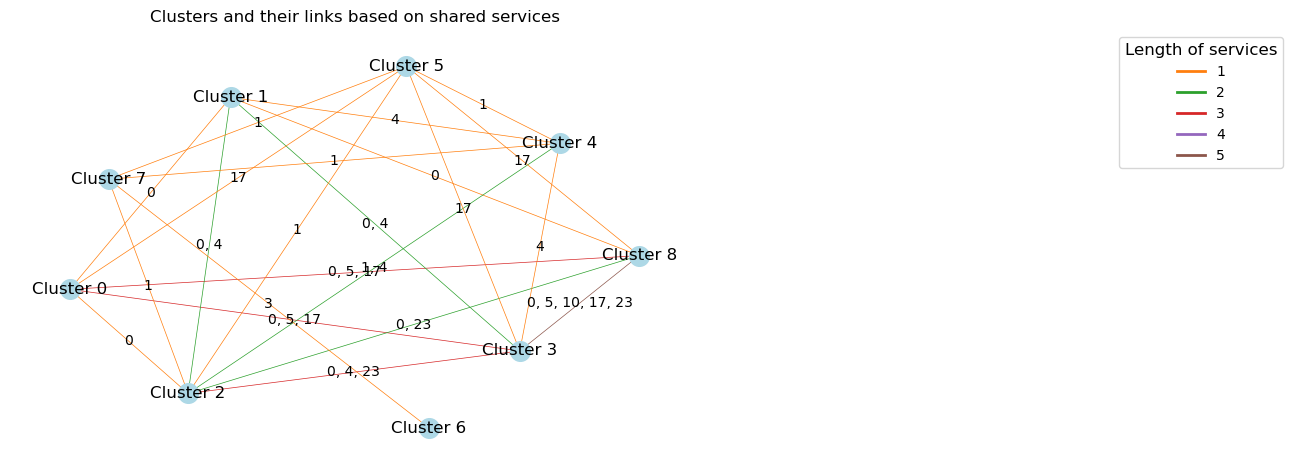

In [82]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Create the graph
G = nx.Graph()

# List to store indices of shared services
service_indices = []

# Dictionary to store links between clusters sharing the same service
service_links = {}

# Iterate through services and used clusters
for service, clusters in service_clusters.items():
    service_index = len(service_indices)  # Current service index
    service_indices.append(service_index)  # Add the service index to the list

    # Create links between clusters sharing the same service
    for i, cluster1 in enumerate(clusters):
        for cluster2 in clusters[i + 1:]:
            # Check if a link already exists between the clusters
            if (cluster1, cluster2) in service_links:
                service_links[(cluster1, cluster2)].append(service_index)
            else:
                service_links[(cluster1, cluster2)] = [service_index]

# Define a color palette for the links
cmap = cm.get_cmap('tab10')

# Convert clusters to strings for graph nodes
clusters_str = {cluster: f"Cluster {cluster}" for cluster in range(num_clusters)}

# Add nodes to the graph
G.add_nodes_from(clusters_str)

# Display the graph
pos = nx.spring_layout(G, k=80)  # Node positioning with a larger k for more spacing

# Draw nodes with cluster numbers
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=200)
nx.draw_networkx_labels(G, pos, labels=clusters_str, font_color='black')

# Draw links with distinct colors based on the length of services_str
for (cluster1, cluster2), services in service_links.items():
    services_str = ', '.join(map(str, services))  # Convert to a string
    color = cmap(len(services) % cmap.N)  # Color based on the length of services
    G.add_edge(cluster1, cluster2, services=services_str)
    nx.draw_networkx_edges(G, pos, edgelist=[(cluster1, cluster2)], edge_color=color, width=0.5)

# Display a legend with different color links based on the length of services_str
legend_handles = []
legend_labels = []
for i in range(1, max(map(len, service_links.values())) + 1):
    color = cmap(i % cmap.N)  # Color based on the length of services
    legend_handles.append(plt.Line2D([0], [0], color=color, lw=2))
    legend_labels.append(str(i))

# Legend for link colors
legend = plt.legend(legend_handles, legend_labels, title='Length of services', loc='upper left', bbox_to_anchor=(1.6, 1))
plt.setp(legend.get_title(), fontsize='large')

# Display indices of shared services on the links
for (u, v, d) in G.edges(data=True):
    services_str = d['services']
    x = (pos[u][0] + pos[v][0]) / 2  # x-coordinate of the middle of the link
    y = (pos[u][1] + pos[v][1]) / 2  # y-coordinate of the middle of the link
    plt.text(x, y, services_str, color='black', ha='center', va='center')

plt.title("Clusters and their links based on shared services")
plt.axis('off')
plt.tight_layout()
# Display the graph with more spacing between nodes
plt.subplots_adjust(right=1.1)
plt.show()


#### Fuzzy C means 

In [83]:
import numpy as np

# FCM algorithm parameters
m = 2.0  # Fuzziness parameter (exponent)
error = 0.005  # Stopping criterion (maximum accepted error)
maxiter = 1  # Maximum number of iterations

# Apply FCM
num_clusters = len(similarity_matrix_ponderee)
num_services = len(similarity_matrix_ponderee[0])

u = np.zeros((num_clusters, num_services))  # Membership matrix

# Use the weighted similarity matrix as the degrees of membership
u = similarity_matrix_ponderee ** (2 / (m - 1))

# Normalize the degrees of membership
u = u / np.sum(u, axis=0)

# Threshold for membership degrees
seuil = 0.19  # You can adjust this threshold as needed

# Initialize clusters
clusters = []

# Assign points to clusters based on the threshold
for i in range(num_services):
    probable_clusters = np.where(u[:, i] >= seuil)[0]
    
    # Handle the case when no probable clusters found
    if len(probable_clusters) == 0:
        clustMax = []
        clustMax.append(np.argmax(u[:, i]))
        clusters.append(clustMax)
    else:
        clusters.append(list(probable_clusters))

# Display the results
print("Fuzzy C-means Membership Matrix:")
print(u)
print("Clusters:")
print(clusters)


Fuzzy C-means Membership Matrix:
[[0.16088757 0.02421378 0.08058692 0.0607958  0.07432257 0.13730531
  0.0920768  0.13852047 0.0697349  0.15654609 0.12962679 0.16052227
  0.0649086  0.16415395 0.11394441 0.0787745  0.13614249 0.187014
  0.10443222 0.13537551 0.1401637  0.07523209 0.08057144 0.04261955
  0.0843787  0.14362575 0.07546644]
 [0.09149621 0.02038585 0.05346376 0.02328094 0.17649195 0.05036959
  0.07783041 0.06660255 0.05484524 0.11339321 0.0498125  0.09131501
  0.05114161 0.07835858 0.10050272 0.0603     0.10350999 0.11792099
  0.05026781 0.08229835 0.0809328  0.04429546 0.05126016 0.02730477
  0.03428842 0.0672194  0.05474382]
 [0.12039227 0.10557309 0.11420823 0.04821473 0.13508221 0.12079642
  0.13285456 0.10119235 0.10339212 0.04464606 0.10936252 0.06639098
  0.12275601 0.13347689 0.13545416 0.15101386 0.09466584 0.09522297
  0.09096321 0.07641351 0.07360236 0.10252007 0.12659345 0.18831921
  0.08973047 0.14468236 0.13691747]
 [0.17240212 0.04216564 0.1503457  0.04831461

In [84]:
# Combine service lists for entity, utility, and application services
services = entityServicesCamelCase + utilityServicesCamelCase + applicationServicesCamelCase

# Initialize the number of clusters to be the same as the number of use cases
num_clusters = num_use_cases

In [85]:
service_clusters = {}  # Dictionary to stock clusters by services

index = 0
for si in clusters:
    service = services[index]
    for numcluster in si:
        service_clusters.setdefault(numcluster, []).append(service)
    index += 1

print(service_clusters)

{8: [['Cargo', 'HandlingHistory', 'JpaHandlingEventRepository', 'HandlingEventTest', 'HandlingEvent', 'CargoTest', 'HandlingHistoryTest', 'HandlingActivity', 'TrackingId', 'JpaCargoRepository', 'Delivery'], ['CannotCreateHandlingEventException', 'UnknownCargoException', 'HandlingEventFactory', 'UnknownVoyageException', 'UnknownLocationException'], ['CargoStatus', 'TrackingEvents'], ['LineParseExceptionListener', 'EventLineParseException', 'EventItemReader', 'EventFilesCheckpoint'], ['HandlingEventRegistrationAttempt', 'HandlingReportService', 'HandlingReport'], ['TrackingEventsDtoAssembler', 'CargoStatusDtoAssembler'], ['EventItemWriter'], ['LoggerProducer'], ['HandlingEventServiceTest', 'DefaultHandlingEventService'], ['DateConverter', 'EventLogger'], ['DefaultBookingService', 'DefaultCargoInspectionService', 'JmsApplicationEvents'], ['MisdirectedCargoConsumer', 'DeliveredCargoConsumer', 'CargoHandledConsumer'], ['RejectedRegistrationAttemptsConsumer', 'HandlingEventRegistrationAttemp

In [86]:
# Display clusters with their services
use_case_names = [entry['name'] for entry in use_cases]
for cluster, services_list in service_clusters.items():
    print(f"Cluster {cluster}:")
    print("NameUseCase :", use_case_names[cluster])
    print("size : ", len(services_list))
    for service_group in services_list:
        
        #print(get_service_indices(service_group))
        print("  -", ", ".join(service_group))
    print()

Cluster 8:
NameUseCase : handleCargoEvent
size :  13
  - Cargo, HandlingHistory, JpaHandlingEventRepository, HandlingEventTest, HandlingEvent, CargoTest, HandlingHistoryTest, HandlingActivity, TrackingId, JpaCargoRepository, Delivery
  - CannotCreateHandlingEventException, UnknownCargoException, HandlingEventFactory, UnknownVoyageException, UnknownLocationException
  - CargoStatus, TrackingEvents
  - LineParseExceptionListener, EventLineParseException, EventItemReader, EventFilesCheckpoint
  - HandlingEventRegistrationAttempt, HandlingReportService, HandlingReport
  - TrackingEventsDtoAssembler, CargoStatusDtoAssembler
  - EventItemWriter
  - LoggerProducer
  - HandlingEventServiceTest, DefaultHandlingEventService
  - DateConverter, EventLogger
  - DefaultBookingService, DefaultCargoInspectionService, JmsApplicationEvents
  - MisdirectedCargoConsumer, DeliveredCargoConsumer, CargoHandledConsumer
  - RejectedRegistrationAttemptsConsumer, HandlingEventRegistrationAttemptConsumer

Cluster

In [87]:
# Convert groundTruthMsUsesCases into a dictionary for easier comparison
ground_truth = {i: set(cluster) for i, cluster in enumerate(groundTruthMsUsesCases3)}

# Initialize variables to keep track of metrics
total_precision = 0
total_recall = 0
total_f1 = 0
total_clusters = len(ground_truth)

# Loop through each cluster in microservices
for cluster, ss in service_clusters.items():
    
    if cluster in ground_truth:
        valIndexService = set()  # Convert to set
        
        for s in ss:
            
            for serviceNames in s:
                
                valIndexService.add(serviceNames)  # Add to set
                
        true_positive = len(valIndexService.intersection(ground_truth[cluster]))
        
        
        false_positive = len(valIndexService.difference(ground_truth[cluster]))
        
        false_negative = len(ground_truth[cluster].difference(valIndexService))
        

        
        precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        #print(precision)
        total_precision += precision
        total_recall += recall
        total_f1 += f1

# Calculate average metrics
average_precision = total_precision / total_clusters
average_recall = total_recall / total_clusters
average_f1 = total_f1 / total_clusters

print("Average Precision:", average_precision*100)
print("Average Recall:", average_recall*100)
print("Average F1-score:", average_f1*100)

Average Precision: 60.92140921409215
Average Recall: 50.08658008658009
Average F1-score: 50.918405266231346


In [88]:
services = entityServicesCamelCase + utilityServicesCamelCase + applicationServicesCamelCase
num_clusters = num_use_cases

In [89]:
index = 0
for service in services: 
    print( " i :", index )
    print(service)
    index+=1
    

 i : 0
['Cargo', 'HandlingHistory', 'JpaHandlingEventRepository', 'HandlingEventTest', 'HandlingEvent', 'CargoTest', 'HandlingHistoryTest', 'HandlingActivity', 'TrackingId', 'JpaCargoRepository', 'Delivery']
 i : 1
['Location', 'RouteCandidate', 'SampleLocations', 'CarrierMovement', 'UnLocode', 'CargoRoute', 'Leg', 'JpaLocationRepository']
 i : 2
['CannotCreateHandlingEventException', 'UnknownCargoException', 'HandlingEventFactory', 'UnknownVoyageException', 'UnknownLocationException']
 i : 3
['SampleVoyages', 'Schedule', 'VoyageNumber', 'Voyage', 'JpaVoyageRepository']
 i : 4
['ItineraryTest', 'RouteSpecificationTest', 'Itinerary', 'RouteSpecification']
 i : 5
['CargoStatus', 'TrackingEvents']
 i : 6
['LineParseExceptionListener', 'EventLineParseException', 'EventItemReader', 'EventFilesCheckpoint']
 i : 7
['HandlingEventRegistrationAttempt', 'HandlingReportService', 'HandlingReport']
 i : 8
['LocationDtoAssembler', 'CargoRouteDtoAssembler', 'ItineraryCandidateDtoAssembler']
 i : 9
['

In [90]:
index = 0
for uc in use_cases:
    print(" i :", index)
    print("name : ", uc["name"])
    print("nanoentities : ", uc["nanoentities"])
    print(" ")
    index +=1

 i : 0
name :  ViewTracking
nanoentities :  ['Cargo.trackingId', 'HandlingEvent.type', 'HandlingEvent.location', 'HandlingEvent.completionTime', 'Delivery.transportStatus', 'Delivery.estimatedArrivalTime', 'Delivery.misdirected', 'Voyage.voyageNumber', 'RouteSpecification.destination']
 
 i : 1
name :  ViewCargos
nanoentities :  ['Cargo.trackingId', 'RouteSpecification.destination', 'RouteSpecification.arrivalDeadline', 'Delivery.routingStatus', 'Itinerary.itineraryNumber']
 
 i : 2
name :  BookCargo
nanoentities :  ['Location.unLocode', 'Cargo.trackingId', 'RouteSpecification.origin', 'RouteSpecification.arrivalDeadline', 'RouteSpecification.destination']
 
 i : 3
name :  ChangeCargoDestination
nanoentities :  ['Cargo.trackingId', 'RouteSpecification.destination', 'RouteSpecification.destination']
 
 i : 4
name :  RouteCargo
nanoentities :  ['Cargo.trackingId', 'RouteSpecification.destination', 'RouteSpecification.origin', 'RouteSpecification.arrivalDeadline', 'Location.unLocode', 'Vo

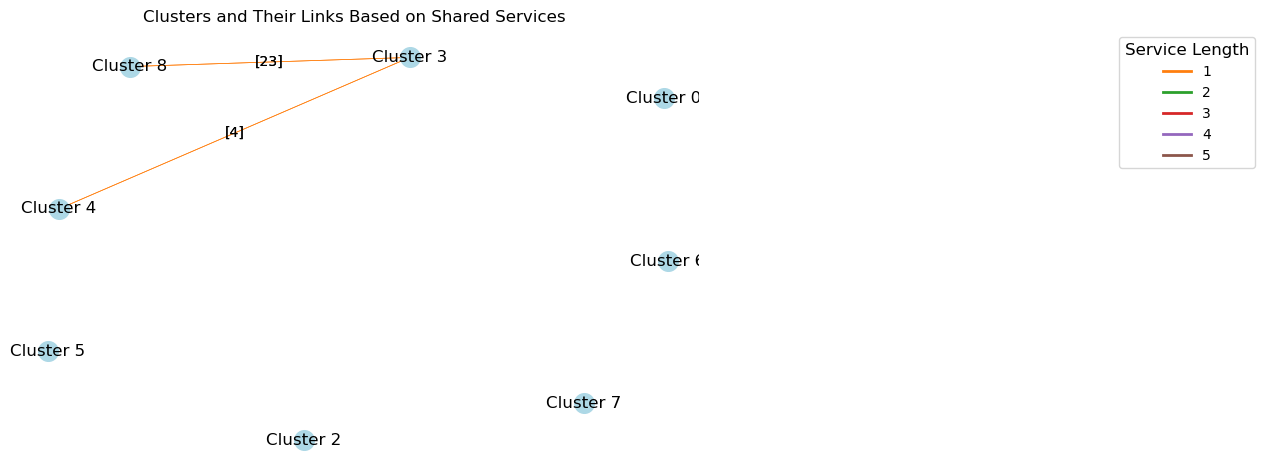

In [91]:
# Import required libraries
import networkx as nx
import matplotlib.pyplot as plt
import json
import matplotlib.cm as cm

# Create a graph
G = nx.Graph()

# Dictionary to store links between clusters sharing the same service
service_links = {}

# Iterate through clusters and services
for cluster, services_list in service_clusters.items():
    G.add_node(cluster)  # Add the cluster node to the graph

    # Iterate through other clusters to find those sharing the same services
    for other_cluster, other_services_list in service_clusters.items():
        if other_cluster == cluster:
            continue  # Ignore the same cluster
        shared_services = [service for service in services_list if service in other_services_list]
        if shared_services:
            
            for s in shared_services:

                if (cluster, other_cluster) in service_links:
                    service_links[(cluster, other_cluster)].extend(get_service_indices(s))
                else:
                    service_links[(cluster, other_cluster)] = get_service_indices(s)

# Define a color palette for the links
cmap = cm.get_cmap('tab10')

# Convert clusters to strings for node labels
cluster_labels = {cluster: f"Cluster {cluster}" for cluster in service_clusters}

# Add nodes to the graph
G.add_nodes_from(cluster_labels)

# Display the graph
pos = nx.spring_layout(G, k=80)  # Node positioning with a larger k for more space

# Draw nodes with cluster labels
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=200)
nx.draw_networkx_labels(G, pos, labels=cluster_labels, font_color='black')

# Draw links with distinct colors based on the length of services
for (cluster1, cluster2), s in service_links.items():
    color = cmap(len(s) % cmap.N)  # Color based on the length of services
    G.add_edge(cluster1, cluster2, s=json.dumps(s))
    nx.draw_networkx_edges(G, pos, edgelist=[(cluster1, cluster2)], edge_color=color, width=0.5)

    # Display the content of the variable s (service_link) on the link
    x = (pos[cluster1][0] + pos[cluster2][0]) / 2
    y = (pos[cluster1][1] + pos[cluster2][1]) / 2
    plt.text(x, y, s, color='black', ha='center', va='center')

# Legend for link colors
legend = plt.legend(legend_handles, legend_labels, title='Service Length', loc='upper left', bbox_to_anchor=(1.6, 1))
plt.setp(legend.get_title(), fontsize='large')

plt.title("Clusters and Their Links Based on Shared Services")
plt.axis('off')
plt.tight_layout()
# Display the graph with more space between nodes
plt.subplots_adjust(right=1.1)
plt.show()


### AJOUT des poids pour les nanoentities (read et write)
(Identifying Microservices Using Functional Decomposition: 4th International Symposium, SETTA 2018, Beijing, China, September 4-6, 2018, Proceedings)

### Read = lower value than write

In [92]:
import json

# Open JSON file
with open('ddd_2_user_representations.json') as f:
    data = json.load(f)


use_cases_nanoentities = []

# Loop through each use case in the JSON
for use_case_nanoentity in data['useCases']:
    name = use_case_nanoentity['name']
    #print(name)
    nanoentity_read = use_case_nanoentity['nanoentitiesRead'] 
    #print(nanoentity_read)
    nanoentity_write = use_case_nanoentity['nanoentitiesWritten']
    #print(nanoentity_write)
    class_names_r = set()
    class_names_w = set()
    
    for nanoentity_r in nanoentity_read:
        class_name_r = nanoentity_r.split('.')[0]
        class_names_r.add(class_name_r)
    for nanoentity_w in nanoentity_write:
        class_name_w = nanoentity_w.split('.')[0]
        class_names_w.add(class_name_w)
    use_cases_nanoentities.append({'name': name, 'nanoentity_read': nanoentity_read,'nanoentity_write': nanoentity_write , 'class_names_read': list(class_names_r),'class_names_write': list(class_names_w)})

# Display results
for use_case in use_cases_nanoentities:
    print('Use Case:', use_case['name'])
    print('Nanoentities_read:', ', '.join(use_case['nanoentity_read']))
    print('Nanoentities_write:', ', '.join(use_case['nanoentity_write']))
    print('Class_names_read:', ', '.join(use_case['class_names_read']))
    print('Class_names_write:', ', '.join(use_case['class_names_write']))
    print()


Use Case: ViewTracking
Nanoentities_read: Cargo.trackingId, HandlingEvent.type, HandlingEvent.location, HandlingEvent.completionTime, Delivery.transportStatus, Delivery.estimatedArrivalTime, Delivery.misdirected, Voyage.voyageNumber, RouteSpecification.destination
Nanoentities_write: 
Class_names_read: RouteSpecification, HandlingEvent, Voyage, Delivery, Cargo
Class_names_write: 

Use Case: ViewCargos
Nanoentities_read: Cargo.trackingId, RouteSpecification.destination, RouteSpecification.arrivalDeadline, Delivery.routingStatus, Itinerary.itineraryNumber
Nanoentities_write: 
Class_names_read: Itinerary, RouteSpecification, Delivery, Cargo
Class_names_write: 

Use Case: BookCargo
Nanoentities_read: Location.unLocode
Nanoentities_write: Cargo.trackingId, RouteSpecification.origin, RouteSpecification.arrivalDeadline, RouteSpecification.destination
Class_names_read: Location
Class_names_write: RouteSpecification, Cargo

Use Case: ChangeCargoDestination
Nanoentities_read: Cargo.trackingId, R

### Kmeans ++

In [93]:
# Import required libraries
from sklearn.cluster import KMeans

# Prepare data for clustering
services = entityServicesCamelCase + utilityServicesCamelCase + applicationServicesCamelCase
# Define service types based on their source (Entity, Utility, or Application)
service_types = ['Entity'] * len(entityServicesCamelCase) + ['Utility'] * len(utilityServicesCamelCase) + ['Application'] * len(applicationServicesCamelCase)

# Initialize variables for the similarity matrix
num_services = len(services)
num_use_cases = len(use_cases_nanoentities)
similarity_matrix = np.zeros((num_use_cases, num_services))

# Iterate through use cases and services
for i, use_case in enumerate(use_cases_nanoentities):
    s1 = split_camel_case(use_case['name'])

    for j, service in enumerate(services):
        similarity = 0
        
        # Iterate through class names in the service
        for class_name in service:
            s2 = split_camel_case(class_name)
            similarity = similarity + service_semantic_similarity(s1, s2)

        # Normalize the similarity by the number of class names in the service
        similarity_matrix[i, j] = similarity / len(service)

# Print the total number of services
print(len(services))


27


In [94]:
# Create an empty matrix to store similarity scores
similarity_matrix2 = np.zeros((num_use_cases, num_services))

# Iterate through use cases and services
for i, use_case in enumerate(use_cases_nanoentities):
    for j, service in enumerate(services):
        similarity_read = 0
        similarity_write = 0

        # Calculate similarity based on class names read
        if len(use_case['class_names_read']) != 0:
            similarity_read = len(set(use_case['class_names_read']) & set(service)) / len(use_case['class_names_read'])

        # Calculate similarity based on class names written
        if len(use_case['class_names_write']) != 0:
            similarity_write = len(set(use_case['class_names_write']) & set(service)) / len(use_case['class_names_write'])

        # Combine similarities with weights: 0.7 for write, 0.3 for read
        similarity_matrix2[i, j] = (0.7 * similarity_write) + (0.3 * similarity_read)

# Print the resulting similarity matrix
print(similarity_matrix2)


[[0.18 0.   0.   0.06 0.06 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.15 0.   0.   0.   0.15 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.35 0.3  0.   0.   0.35 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.15 0.   0.   0.   0.85 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.06 0.47 0.   0.06 0.41 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.7  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.7  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.7  0.   0.3  0.   0.   0.

In [95]:
import numpy as np

# Create a weighted combination of two similarity matrices
similarity_matrix_ponderee = np.multiply(similarity_matrix, 0.6) + np.multiply(similarity_matrix2, 0.4)

# Print the resulting weighted similarity matrix
print(similarity_matrix_ponderee)


[[0.26738265 0.14602189 0.19764451 0.18084766 0.16230242 0.28143734
  0.18612589 0.23623912 0.1780258  0.19340232 0.27207018 0.27159421
  0.1293954  0.15325182 0.19435287 0.17983751 0.21963679 0.3448465
  0.22104658 0.20283151 0.20502569 0.20227915 0.18428038 0.1538599
  0.16757837 0.22599343 0.11585641]
 [0.18833065 0.13398341 0.16098381 0.14656578 0.19640361 0.17045992
  0.17112219 0.16380994 0.15788008 0.16460162 0.16865636 0.20484433
  0.11485633 0.10588228 0.18252962 0.15734253 0.19151349 0.27383207
  0.15335979 0.15814699 0.15579474 0.15521338 0.14698686 0.12315166
  0.10682559 0.15460622 0.09867581]
 [0.3832917  0.29157078 0.23528875 0.21092215 0.30097142 0.2639764
  0.22357329 0.20191505 0.21677119 0.10328378 0.2499009  0.17466561
  0.17794636 0.13819204 0.2119047  0.248998   0.18314914 0.24607054
  0.20630009 0.15238789 0.1485718  0.23613153 0.23099052 0.32342108
  0.17281106 0.22682319 0.15605316]
 [0.31069337 0.19269304 0.2699591  0.2111405  0.52678371 0.31531278
  0.2115261

In [96]:
from sklearn.cluster import KMeans

# Define the parameters for K-means++
num_clusters = num_use_cases
max_iter = 1  # Number of iterations
random_state = 0

# Use the centers of use cases as initialization
use_case_centers = similarity_matrix_ponderee[:num_clusters, :]

# Initialize the K-means++ clustering algorithm
kmeans = KMeans(n_clusters=num_clusters, init=use_case_centers, max_iter=max_iter, random_state=random_state)

# Fit the algorithm to the weighted similarity matrix
kmeans.fit(similarity_matrix_ponderee)

# Obtain cluster labels for each service
cluster_labels = kmeans.labels_


In [97]:
service_clusters = {}  # Dictonary to stock clusters by services
service_clusters = dict(service_clusters)
for service in services:
    tupleService = tuple(service)
    service_clusters[tupleService] = []
    

In [98]:
# Create a dictionary to store services grouped by microservices
microservices = {i: [] for i in range(num_clusters)}

# Loop through the services and assign them to microservices based on a similarity threshold
for j, tabScore in enumerate(similarity_matrix_ponderee):
    listservice = []
    for k, score in enumerate(tabScore):
        if score > 0.28:  # Adjust this threshold as needed
            listservice.append((services[k], service_types[k]))
            
            # Check if the service exists in the service_clusters dictionary and add its index to the cluster
            if tuple(services[k]) in service_clusters:
                service_clusters[tuple(services[k])].append(j)

    # Extend the microservices dictionary with the services
    microservices[j].extend(listservice)

# Display the results
for cluster, services in microservices.items():
    print('Cluster:', cluster)
    print('Size of the cluster:', len(services))
    print('Services:')
    for service, service_type in services:
        print('- Service:', service)
        print('  Service Type:', service_type)
    print()


Cluster: 0
Size of the cluster: 2
Services:
- Service: ['CargoStatus', 'TrackingEvents']
  Service Type: Entity
- Service: ['RealtimeCargoTrackingService', 'LocationViewAdapter', 'RealtimeCargoTrackingViewAdapter', 'DomainObjectUtils']
  Service Type: Application

Cluster: 1
Size of the cluster: 0
Services:

Cluster: 2
Size of the cluster: 4
Services:
- Service: ['Cargo', 'HandlingHistory', 'JpaHandlingEventRepository', 'HandlingEventTest', 'HandlingEvent', 'CargoTest', 'HandlingHistoryTest', 'HandlingActivity', 'TrackingId', 'JpaCargoRepository', 'Delivery']
  Service Type: Entity
- Service: ['Location', 'RouteCandidate', 'SampleLocations', 'CarrierMovement', 'UnLocode', 'CargoRoute', 'Leg', 'JpaLocationRepository']
  Service Type: Entity
- Service: ['ItineraryTest', 'RouteSpecificationTest', 'Itinerary', 'RouteSpecification']
  Service Type: Entity
- Service: ['MisdirectedCargoConsumer', 'DeliveredCargoConsumer', 'CargoHandledConsumer']
  Service Type: Application

Cluster: 3
Size of

In [99]:
services = entityServicesCamelCase + utilityServicesCamelCase + applicationServicesCamelCase
num_clusters = num_use_cases

In [100]:
print(services)

[['Cargo', 'HandlingHistory', 'JpaHandlingEventRepository', 'HandlingEventTest', 'HandlingEvent', 'CargoTest', 'HandlingHistoryTest', 'HandlingActivity', 'TrackingId', 'JpaCargoRepository', 'Delivery'], ['Location', 'RouteCandidate', 'SampleLocations', 'CarrierMovement', 'UnLocode', 'CargoRoute', 'Leg', 'JpaLocationRepository'], ['CannotCreateHandlingEventException', 'UnknownCargoException', 'HandlingEventFactory', 'UnknownVoyageException', 'UnknownLocationException'], ['SampleVoyages', 'Schedule', 'VoyageNumber', 'Voyage', 'JpaVoyageRepository'], ['ItineraryTest', 'RouteSpecificationTest', 'Itinerary', 'RouteSpecification'], ['CargoStatus', 'TrackingEvents'], ['LineParseExceptionListener', 'EventLineParseException', 'EventItemReader', 'EventFilesCheckpoint'], ['HandlingEventRegistrationAttempt', 'HandlingReportService', 'HandlingReport'], ['LocationDtoAssembler', 'CargoRouteDtoAssembler', 'ItineraryCandidateDtoAssembler'], ['Coordinates', 'CoordinatesFactory'], ['TrackingEventsDtoAsse

In [101]:
# Convert groundTruthMsUsesCases into a dictionary for easier comparison
ground_truth = {i: set(cluster) for i, cluster in enumerate(groundTruthMsUsesCases3)}

# Initialize variables to keep track of metrics
total_precision = 0
total_recall = 0
total_f1 = 0
total_clusters = len(ground_truth)

# Loop through each cluster in microservices
for cluster, ss in microservices.items():
    
    if cluster in ground_truth:
        valIndexService = set()  # Convert to set
        
        for s in ss:
            
            for serviceNames in s[0]:
                valIndexService.add(serviceNames)  # Add to set
                
        true_positive = len(valIndexService.intersection(ground_truth[cluster]))
        
        
        false_positive = len(valIndexService.difference(ground_truth[cluster]))
        
        false_negative = len(ground_truth[cluster].difference(valIndexService))
        

        
        precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        #print(precision)
        total_precision += precision
        total_recall += recall
        total_f1 += f1

# Calculate average metrics
average_precision = total_precision / total_clusters
average_recall = total_recall / total_clusters
average_f1 = total_f1 / total_clusters

print("Average Precision:", average_precision*100)
print("Average Recall:", average_recall*100)
print("Average F1-score:", average_f1*100)

Average Precision: 61.27088627088627
Average Recall: 64.41558441558442
Average F1-score: 59.993976532765956


In [102]:
i = 0
for service, clusters in service_clusters.items():
    
    print('Service:',i, service)
    print('Clusters used:', clusters)
    i = i+1
    print()


Service: 0 ('Cargo', 'HandlingHistory', 'JpaHandlingEventRepository', 'HandlingEventTest', 'HandlingEvent', 'CargoTest', 'HandlingHistoryTest', 'HandlingActivity', 'TrackingId', 'JpaCargoRepository', 'Delivery')
Clusters used: [2, 3, 8]

Service: 1 ('Location', 'RouteCandidate', 'SampleLocations', 'CarrierMovement', 'UnLocode', 'CargoRoute', 'Leg', 'JpaLocationRepository')
Clusters used: [2, 4, 5, 7]

Service: 2 ('CannotCreateHandlingEventException', 'UnknownCargoException', 'HandlingEventFactory', 'UnknownVoyageException', 'UnknownLocationException')
Clusters used: [8]

Service: 3 ('SampleVoyages', 'Schedule', 'VoyageNumber', 'Voyage', 'JpaVoyageRepository')
Clusters used: [6]

Service: 4 ('ItineraryTest', 'RouteSpecificationTest', 'Itinerary', 'RouteSpecification')
Clusters used: [2, 3, 4]

Service: 5 ('CargoStatus', 'TrackingEvents')
Clusters used: [0, 3, 8]

Service: 6 ('LineParseExceptionListener', 'EventLineParseException', 'EventItemReader', 'EventFilesCheckpoint')
Clusters used

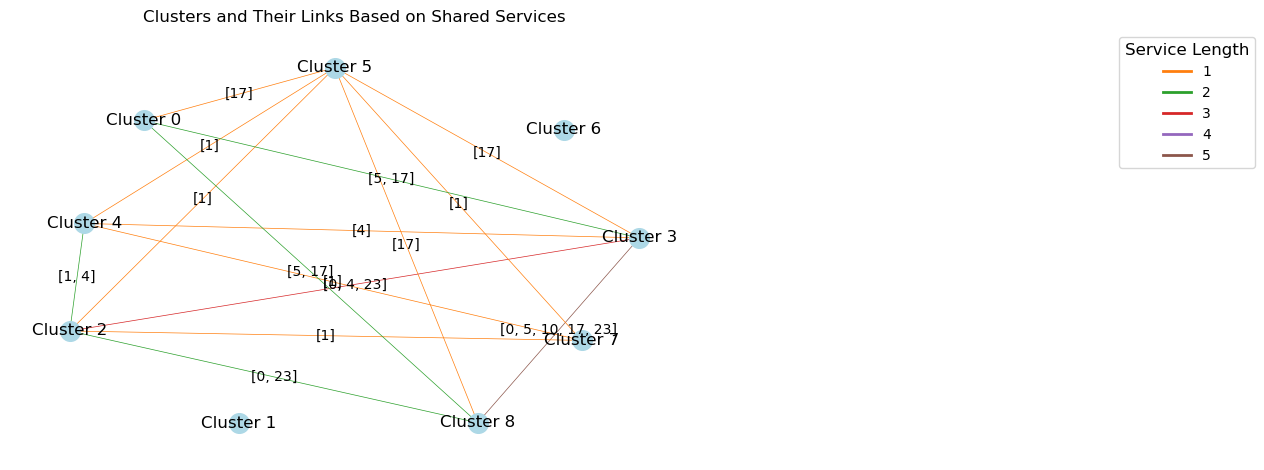

In [103]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Create a graph
G = nx.Graph()

# List to store the indices of shared services
service_indices = []

# Dictionary to store links between clusters sharing the same service
service_links = {}

# Iterate through services and the clusters they are assigned to
for service, clusters in service_clusters.items():
    service_index = len(service_indices)  # Current service index
    service_indices.append(service_index)  # Add the service index to the list

    # Create links between clusters that share the same service
    for i, cluster1 in enumerate(clusters):
        for cluster2 in clusters[i + 1:]:
            # Check if a link already exists between the clusters
            if (cluster1, cluster2) in service_links:
                service_links[(cluster1, cluster2)].append(service_index)
            else:
                service_links[(cluster1, cluster2)] = [service_index]

# Define a color palette for the links
cmap = cm.get_cmap('tab10')

# Convert cluster indices to strings for graph nodes
clusters_str = {cluster: f"Cluster {cluster}" for cluster in range(num_clusters)}

# Add nodes to the graph
G.add_nodes_from(clusters_str)

# Display the graph
pos = nx.spring_layout(G, k=80)  # Node positioning with a larger k for more spacing

# Draw nodes with cluster numbers
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=200)
nx.draw_networkx_labels(G, pos, labels=clusters_str, font_color='black')

# Draw links with distinct colors based on the length of services_str
for (cluster1, cluster2), services in service_links.items():
    
    services_str = json.dumps(services)  # Convert to a string
    
    color = cmap(len(services) % cmap.N)  # Color based on the length of services
    G.add_edge(cluster1, cluster2, services=services_str)
    nx.draw_networkx_edges(G, pos, edgelist=[(cluster1, cluster2)], edge_color=color, width=0.5)

# Display a legend with different link colors based on the length of services_str
legend_handles = []
legend_labels = []
for i in range(1, max(map(len, service_links.values())) + 1):
    color = cmap(i % cmap.N)  # Color based on the length of services
    legend_handles.append(plt.Line2D([0], [0], color=color, lw=2))
    legend_labels.append(i)

# Legend for link colors
legend = plt.legend(legend_handles, legend_labels, title='Service Length', loc='upper left', bbox_to_anchor=(1.6, 1))
plt.setp(legend.get_title(), fontsize='large')

# Display the indices of shared services on the links
for (u, v, d) in G.edges(data=True):
    services_str = d['services']
    x = (pos[u][0] + pos[v][0]) / 2  # x-coordinate of the link's midpoint
    y = (pos[u][1] + pos[v][1]) / 2  # y-coordinate of the link's midpoint
    plt.text(x, y, services_str, color='black', ha='center', va='center')

plt.title("Clusters and Their Links Based on Shared Services")
plt.axis('off')
plt.tight_layout()
# Display the graph with more spacing between nodes
plt.subplots_adjust(right=1.1)
plt.show()


#### Fuzzy C means 

In [104]:
services = entityServicesCamelCase + utilityServicesCamelCase + applicationServicesCamelCase
num_clusters = num_use_cases

# Create a dictionary to store associations between class names and service indices
classe_service_mapping = {}


# Iterate through each class in nodeListe2
for classe in nodeListe2:
    for index, service in enumerate(services):
        
        if classe in service:
            # Map the class name to its corresponding service index
            classe_service_mapping[classe] = index
            break

# Print the result
print(classe_service_mapping)


{'BookingServiceFacade': 15, 'SampleVoyages': 3, 'BookingServiceTestDataGenerator': 25, 'Cargo': 0, 'ItineraryTest': 4, 'Location': 1, 'DefaultBookingService': 22, 'ExternalRoutingServiceTest': 16, 'HandlingEventServiceTest': 18, 'CargoStatus': 5, 'SampleDataGenerator': 19, 'DateConverter': 20, 'RealtimeCargoTrackingService': 17, 'CannotCreateHandlingEventException': 2, 'MisdirectedCargoConsumer': 23, 'RejectedRegistrationAttemptsConsumer': 24}


In [105]:
def find_index_by_value(data, value_to_find=None, index_to_get=None):
    if value_to_find is not None:
        # Search through the dictionary to find the index of the value equal to value_to_find
        index = 0
        for key, value in data.items():
            if value == value_to_find:
                return index
            index += 1
        # If the value is not found, return -1
        return -1
    elif index_to_get is not None:
        # If index_to_get is valid, return the corresponding key
        if 0 <= index_to_get < len(data):
            return list(data.keys())[index_to_get]
        else:
            return None
    else:
        # If neither value_to_find nor index_to_get is specified, return None
        return None


In [106]:
import numpy as np

# FCM algorithm parameters
m = 2.0  # Fuzziness parameter (exponent)
error = 0.005  # Stopping criterion (maximum allowable error)
maxiter = 1  # Maximum number of iterations

# Apply FCM
num_clusters = len(similarity_matrix_ponderee)
num_services = len(similarity_matrix_ponderee[0])

# Initialize the membership matrix
u = np.zeros((num_clusters, num_services))

# Calculate membership degrees using the weighted similarity matrix
u = similarity_matrix_ponderee ** (2 / (m - 1))

# Normalize the membership degrees
u = u / np.sum(u, axis=0)

# Threshold for membership degrees
seuil = 0.19  # You can adjust this threshold as needed

# Initialize clusters
clusters = []

# Assign points to clusters based on the threshold
for i in range(num_services):
    probable_clusters = np.where(u[:, i] >= seuil)[0]

    if len(probable_clusters) == 0:
        clustMax = [np.argmax(u[:, i])]
        clusters.append(clustMax)
    else:
        clusters.append(list(probable_clusters))

# Display the results
print("Fuzzy C-Means Membership Matrix:")
print(u)
print("Clusters:")
print(clusters)


Fuzzy C-Means Membership Matrix:
[[0.07767628 0.02597498 0.08058692 0.04939004 0.03686066 0.13730531
  0.0920768  0.13852047 0.0697349  0.15654609 0.12962679 0.16052227
  0.0649086  0.16415395 0.11394441 0.0787745  0.13614249 0.187014
  0.10443222 0.13537551 0.1401637  0.07523209 0.08057144 0.04261955
  0.0843787  0.14362575 0.07546644]
 [0.03853576 0.02186862 0.05346376 0.03243985 0.05397741 0.05036959
  0.07783041 0.06660255 0.05484524 0.11339321 0.0498125  0.09131501
  0.05114161 0.07835858 0.10050272 0.0603     0.10350999 0.11792099
  0.05026781 0.08229835 0.0809328  0.04429546 0.05126016 0.02730477
  0.03428842 0.0672194  0.05474382]
 [0.1596176  0.10356365 0.11420823 0.06718279 0.12675458 0.12079642
  0.13285456 0.10119235 0.10339212 0.04464606 0.10936252 0.06639098
  0.12275601 0.13347689 0.13545416 0.15101386 0.09466584 0.09522297
  0.09096321 0.07641351 0.07360236 0.10252007 0.12659345 0.18831921
  0.08973047 0.14468236 0.13691747]
 [0.10487837 0.04523259 0.1503457  0.06732195

In [107]:
services = entityServicesCamelCase + utilityServicesCamelCase + applicationServicesCamelCase
num_clusters = num_use_cases

In [108]:
service_clusters = {}  # Data structure to store clusters for each service

index = 0
for si in clusters:
    service = services[index]
    for numcluster in si:
        # Add the service to the corresponding cluster in the dictionary
        service_clusters.setdefault(numcluster, []).append(service)
    index += 1


In [109]:
index = 0
for service in services: 
    print( " i :", index )
    print(service)
    index+=1
    

 i : 0
['Cargo', 'HandlingHistory', 'JpaHandlingEventRepository', 'HandlingEventTest', 'HandlingEvent', 'CargoTest', 'HandlingHistoryTest', 'HandlingActivity', 'TrackingId', 'JpaCargoRepository', 'Delivery']
 i : 1
['Location', 'RouteCandidate', 'SampleLocations', 'CarrierMovement', 'UnLocode', 'CargoRoute', 'Leg', 'JpaLocationRepository']
 i : 2
['CannotCreateHandlingEventException', 'UnknownCargoException', 'HandlingEventFactory', 'UnknownVoyageException', 'UnknownLocationException']
 i : 3
['SampleVoyages', 'Schedule', 'VoyageNumber', 'Voyage', 'JpaVoyageRepository']
 i : 4
['ItineraryTest', 'RouteSpecificationTest', 'Itinerary', 'RouteSpecification']
 i : 5
['CargoStatus', 'TrackingEvents']
 i : 6
['LineParseExceptionListener', 'EventLineParseException', 'EventItemReader', 'EventFilesCheckpoint']
 i : 7
['HandlingEventRegistrationAttempt', 'HandlingReportService', 'HandlingReport']
 i : 8
['LocationDtoAssembler', 'CargoRouteDtoAssembler', 'ItineraryCandidateDtoAssembler']
 i : 9
['

In [110]:
seuil = 0.19  # You can adjust this threshold as needed
seuil_vide1 = 0.18
seuil_vide2 = 0.11

# Initialize clusters
clusters = []

# Assign data points to clusters based on the threshold
for i in range(num_clusters):
    probable_clusters = np.where(u[i, :] >= seuil)[0]

    print("PB: ", probable_clusters)
    if len(probable_clusters) == 0:
        # If no clusters meet the primary threshold, try a secondary threshold
        pb_clusters = np.where(u[i, :] >= seuil_vide1)[0]
        clusters.append(list(pb_clusters))
        
        if len(pb_clusters) == 0:
            # If still no clusters, try a tertiary threshold
            clusters.pop()
            pb_clusters2 = np.where(u[i, :] >= seuil_vide2)[0]
            clusters.append(list(pb_clusters2))
    else:
        clusters.append(list(probable_clusters))

# Display the results
print("Fuzzy C-means Membership Matrix:")
print(u)
print("Clusters:")
print(clusters)


PB:  []
PB:  []
PB:  []
PB:  [ 4 15 21 23]
PB:  [1 4]
PB:  [ 1  8  9 11 19]
PB:  [3]
PB:  [ 1 26]
PB:  [ 0  2  5  6 12 13 18 20 22 23]
Fuzzy C-means Membership Matrix:
[[0.07767628 0.02597498 0.08058692 0.04939004 0.03686066 0.13730531
  0.0920768  0.13852047 0.0697349  0.15654609 0.12962679 0.16052227
  0.0649086  0.16415395 0.11394441 0.0787745  0.13614249 0.187014
  0.10443222 0.13537551 0.1401637  0.07523209 0.08057144 0.04261955
  0.0843787  0.14362575 0.07546644]
 [0.03853576 0.02186862 0.05346376 0.03243985 0.05397741 0.05036959
  0.07783041 0.06660255 0.05484524 0.11339321 0.0498125  0.09131501
  0.05114161 0.07835858 0.10050272 0.0603     0.10350999 0.11792099
  0.05026781 0.08229835 0.0809328  0.04429546 0.05126016 0.02730477
  0.03428842 0.0672194  0.05474382]
 [0.1596176  0.10356365 0.11420823 0.06718279 0.12675458 0.12079642
  0.13285456 0.10119235 0.10339212 0.04464606 0.10936252 0.06639098
  0.12275601 0.13347689 0.13545416 0.15101386 0.09466584 0.09522297
  0.09096321 0

In [111]:
# Create an empty dictionary to store clusters of services
service_clusters = {}

# Iterate through the clusters and their assigned data points
for cmpt, ss in enumerate(clusters):
    # For each cluster, create an empty list to store service names
    service_clusters[cmpt] = []
    
    # Iterate through the data points in the cluster
    for s in ss:
        # Append the names of services (from the 'services' list) to the list
        service_clusters[cmpt].append(services[s])

# Print the dictionary of service clusters
#print(service_clusters)


In [112]:
#Display clusters with their services
use_case_names = [entry['name'] for entry in use_cases]
for numc, servs in enumerate(clusters):
    print("Cluster : ",numc)
    print("NameUseCase :", use_case_names[numc])
    print("size : ", len(servs))
    for serv in servs:
        
        print("- ", services[serv])

Cluster :  0
NameUseCase : ViewTracking
size :  1
-  ['RealtimeCargoTrackingService', 'LocationViewAdapter', 'RealtimeCargoTrackingViewAdapter', 'DomainObjectUtils']
Cluster :  1
NameUseCase : ViewCargos
size :  2
-  ['Coordinates', 'CoordinatesFactory']
-  ['RealtimeCargoTrackingService', 'LocationViewAdapter', 'RealtimeCargoTrackingViewAdapter', 'DomainObjectUtils']
Cluster :  2
NameUseCase : BookCargo
size :  1
-  ['MisdirectedCargoConsumer', 'DeliveredCargoConsumer', 'CargoHandledConsumer']
Cluster :  3
NameUseCase : ChangeCargoDestination
size :  4
-  ['ItineraryTest', 'RouteSpecificationTest', 'Itinerary', 'RouteSpecification']
-  ['BookingServiceFacade', 'DefaultBookingServiceFacade', 'ChangeDestination', 'CargoDetails', 'ChangeArrivalDeadline', 'ListCargo', 'ItinerarySelection', 'Booking', 'Track']
-  ['ChangeDestinationDialog', 'ChangeArrivalDeadlineDialog']
-  ['MisdirectedCargoConsumer', 'DeliveredCargoConsumer', 'CargoHandledConsumer']
Cluster :  4
NameUseCase : RouteCargo


In [113]:
# Convert groundTruthMsUsesCases into a dictionary for easier comparison
ground_truth = {i: set(cluster) for i, cluster in enumerate(groundTruthMsUsesCases3)}

# Initialize variables to keep track of metrics
total_precision = 0
total_recall = 0
total_f1 = 0
total_clusters = len(ground_truth)

# Loop through each cluster in microservices
for cluster, ss in service_clusters.items():
    
    if cluster in ground_truth:
        valIndexService = set()  # Convert to set
        
        for s in ss:
            
            for serviceNames in s:
                
                valIndexService.add(serviceNames)  # Add to set
                
        true_positive = len(valIndexService.intersection(ground_truth[cluster]))
        
        
        false_positive = len(valIndexService.difference(ground_truth[cluster]))
        
        false_negative = len(ground_truth[cluster].difference(valIndexService))
        

        
        precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        #print(precision)
        total_precision += precision
        total_recall += recall
        total_f1 += f1

# Calculate average metrics
average_precision = total_precision / total_clusters
average_recall = total_recall / total_clusters
average_f1 = total_f1 / total_clusters

print("Average Precision:", average_precision*100)
print("Average Recall:", average_recall*100)
print("Average F1-score:", average_f1*100)

Average Precision: 73.88096652802534
Average Recall: 68.35386835386835
Average F1-score: 68.617837466291


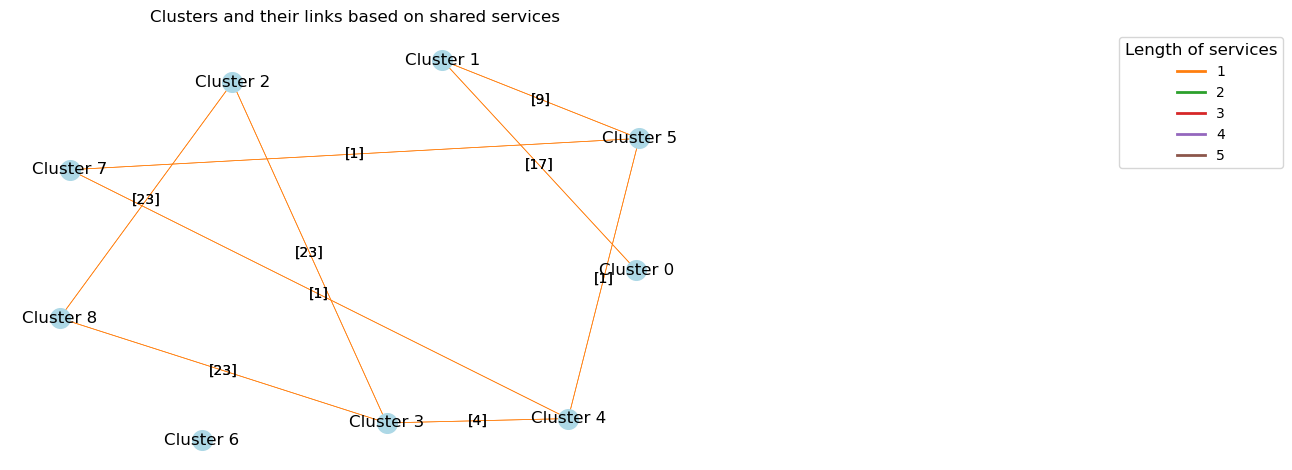

In [114]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import matplotlib.cm as cm  # Importing the cmap module

# Create a graph
G = nx.Graph()

# Dictionary to store links between clusters sharing the same service
service_links = {}

# Iterate through clusters and services
for cluster, services_list in service_clusters.items():
    G.add_node(cluster)  # Add the cluster node
    
    # Iterate through other clusters to find those sharing the same services
    for other_cluster, other_services_list in service_clusters.items():
        if other_cluster == cluster:
            continue  # Skip the same cluster
        shared_services = [service for service in services_list if service in other_services_list]
        if shared_services:
            
            for s in shared_services:
                if (cluster, other_cluster) in service_links:
                    # Append the service indices to the existing link
                    service_links[(cluster, other_cluster)].extend(get_service_indices(s))
                else:
                    # Create a new link with the service indices
                    service_links[(cluster, other_cluster)] = get_service_indices(s)

# Define a color palette for the links
cmap = cm.get_cmap('tab10')

# Convert cluster labels to strings for graph nodes
cluster_labels = {cluster: f"Cluster {cluster}" for cluster in service_clusters}

# Add nodes to the graph
G.add_nodes_from(cluster_labels)

# Display the graph
pos = nx.spring_layout(G, k=80)  # Position the nodes with a larger k for more spacing

# Draw nodes with cluster numbers
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=200)
nx.draw_networkx_labels(G, pos, labels=cluster_labels, font_color='black')

# Draw links with different colors based on the length of services_str
for (cluster1, cluster2), s in service_links.items():
    color = cmap(len(s) % cmap.N)  # Color based on the length of services
    G.add_edge(cluster1, cluster2, s=json.dumps(s))
    nx.draw_networkx_edges(G, pos, edgelist=[(cluster1, cluster2)], edge_color=color, width=0.5)

    # Display the content of variable s (service_link) on the link
    x = (pos[cluster1][0] + pos[cluster2][0]) / 2
    y = (pos[cluster1][1] + pos[cluster2][1]) / 2
    plt.text(x, y, s, color='black', ha='center', va='center')

# Legend for link colors
legend = plt.legend(legend_handles, legend_labels, title='Length of services', loc='upper left', bbox_to_anchor=(1.6, 1))
plt.setp(legend.get_title(), fontsize='large')

plt.title("Clusters and their links based on shared services")
plt.axis('off')
plt.tight_layout()
# Display the graph with more spacing between nodes
plt.subplots_adjust(right=1.1)
plt.show()
